# CSC 466 Project Codebook: Question 2 Clustering

Brendan Callender, Andrew Kerr, Martin Hsu, Sophia Chung

In [142]:
import pandas as pd
import numpy as np
import os
import wget
import zipfile

from kmeans import *
from dbscan import *

## Data Load

In [139]:
if not os.path.exists("data/beneficiary/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/downloadable-public-use-files/synpufs/downloads/de1_0_2008_beneficiary_summary_file_sample_1.zip", "de1_0_2008_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2008_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2008_beneficiary_summary_file_sample_1.zip")
if not os.path.exists("data/beneficiary/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/downloadable-public-use-files/synpufs/downloads/de1_0_2009_beneficiary_summary_file_sample_1.zip", "de1_0_2009_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2009_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2009_beneficiary_summary_file_sample_1.zip")
if not os.path.exists("data/beneficiary/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/statistics-trends-and-reports/synpufs/downloads/de1_0_2010_beneficiary_summary_file_sample_20.zip", "de1_0_2010_beneficiary_summary_file_sample_1.zip")
    with zipfile.ZipFile("de1_0_2010_beneficiary_summary_file_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/beneficiary")
    os.remove("de1_0_2010_beneficiary_summary_file_sample_1.zip")

In [140]:
if not os.path.exists("data/inpatient/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv"):
    wget.download("https://www.cms.gov/research-statistics-data-and-systems/downloadable-public-use-files/synpufs/downloads/de1_0_2008_to_2010_inpatient_claims_sample_1.zip", "de1_0_2008_to_2010_inpatient_claims_sample_1.zip")
    with zipfile.ZipFile("de1_0_2008_to_2010_inpatient_claims_sample_1.zip", 'r') as zip_ref:
        zip_ref.extractall("data/inpatient")
    os.remove("de1_0_2008_to_2010_inpatient_claims_sample_1.zip")

## Data Wrangling

In [2]:
bene_2008 = pd.read_csv("data/beneficiary/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv")
bene_2008["Year"] = pd.to_datetime("12-31-2008")
bene_2008["BENE_BIRTH_DT"] = pd.to_datetime(bene_2008["BENE_BIRTH_DT"].astype(str))
bene_2008 = bene_2008.set_index("DESYNPUF_ID")
bene_2008

BENE_BIRTH_DT  BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
DESYNPUF_ID                                                        
00013D2EFD8E45D1    1923-05-01            NaN                  1   
00016F745862898F    1943-01-01            NaN                  1   
0001FDD721E223DC    1936-09-01            NaN                  2   
00021CA6FF03E670    1941-06-01            NaN                  1   
00024B3D2352D2D0    1936-08-01            NaN                  1   
...                        ...            ...                ...   
FFFD7C464C94D136    1943-07-01            NaN                  2   
FFFE3ED9582AD46E    1916-06-01            NaN                  2   
FFFE7AB5D7F1725D    1939-04-01            NaN                  2   
FFFF29A2E1362059    1911-07-01            NaN                  1   
FFFF7C107A4E385A    1952-04-01            NaN                  2   

                  BENE_RACE_CD BENE_ESRD_IND  SP_STATE_CODE  BENE_COUNTY_CD  \
DESYNPUF_ID                                                                   
00013D2EFD8E45D1             1             0             26             950   
00016F745862898F             1             0             39             230   
0001FDD721E223DC             1             0             39             280   
00021CA6FF03E670             5             0              6             290   
00024B3D2352D2D0             1             0             52             590   
...                        ...           ...            ...             ...   
FFFD7C464C94D136             1             0             54               0   
FFFE3ED9582AD46E             1             0              6             150   
FFFE7AB5D7F1725D             1             0             23             490   
FFFF29A2E1362059             1             0             29              20   
FFFF7C107A4E385A             1             0             21              20   

                  BENE_HI_CVRAGE_TOT_MONS  BENE_SMI_CVRAGE_TOT_MONS  \
DESYNPUF_ID                                                           
00013D2EFD8E45D1                       12                        12   
00016F745862898F                       12                        12   
0001FDD721E223DC                       12                        12   
00021CA6FF03E670                        0                         0   
00024B3D2352D2D0                       12                        12   
...                                   ...                       ...   
FFFD7C464C94D136                       12                        12   
FFFE3ED9582AD46E                       12                        12   
FFFE7AB5D7F1725D                       12                        12   
FFFF29A2E1362059                        0                        12   
FFFF7C107A4E385A                       12                        12   

                  BENE_HMO_CVRAGE_TOT_MONS  ...  MEDREIMB_IP  BENRES_IP  \
DESYNPUF_ID                                 ...                           
00013D2EFD8E45D1                        12  ...          0.0        0.0   
00016F745862898F                         0  ...          0.0        0.0   
0001FDD721E223DC                         0  ...          0.0        0.0   
00021CA6FF03E670                         0  ...          0.0        0.0   
00024B3D2352D2D0                         0  ...          0.0        0.0   
...                                    ...  ...          ...        ...   
FFFD7C464C94D136                         0  ...          0.0        0.0   
FFFE3ED9582AD46E                         0  ...          0.0        0.0   
FFFE7AB5D7F1725D                         0  ...          0.0        0.0   
FFFF29A2E1362059                         0  ...          0.0        0.0   
FFFF7C107A4E385A                         0  ...          0.0        0.0   

                  PPPYMT_IP  MEDREIMB_OP  BENRES_OP  PPPYMT_OP  MEDREIMB_CAR  \
DESYNPUF_ID                                                                    
00013D2EFD8E45D1        0.0         50.0    

In [3]:
bene_2009 = pd.read_csv("data/beneficiary/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv")
bene_2009["Year"] = pd.to_datetime("12-31-2009")
bene_2009["BENE_BIRTH_DT"] = pd.to_datetime(bene_2009["BENE_BIRTH_DT"].astype(str))
bene_2009 = bene_2009.set_index("DESYNPUF_ID")
bene_2009

BENE_BIRTH_DT  BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
DESYNPUF_ID                                                        
00013D2EFD8E45D1    1923-05-01            NaN                  1   
00016F745862898F    1943-01-01            NaN                  1   
0001FDD721E223DC    1936-09-01            NaN                  2   
00021CA6FF03E670    1941-06-01            NaN                  1   
00024B3D2352D2D0    1936-08-01            NaN                  1   
...                        ...            ...                ...   
FFFD7C464C94D136    1943-07-01            NaN                  2   
FFFE3ED9582AD46E    1916-06-01            NaN                  2   
FFFE7AB5D7F1725D    1939-04-01            NaN                  2   
FFFF29A2E1362059    1911-07-01            NaN                  1   
FFFF7C107A4E385A    1952-04-01            NaN                  2   

                  BENE_RACE_CD BENE_ESRD_IND  SP_STATE_CODE  BENE_COUNTY_CD  \
DESYNPUF_ID                                                                   
00013D2EFD8E45D1             1             0             26             950   
00016F745862898F             1             0             39             230   
0001FDD721E223DC             1             0             39             280   
00021CA6FF03E670             5             0              6             290   
00024B3D2352D2D0             1             0             52             590   
...                        ...           ...            ...             ...   
FFFD7C464C94D136             1             0             54               0   
FFFE3ED9582AD46E             1             0              6             150   
FFFE7AB5D7F1725D             1             0             23             490   
FFFF29A2E1362059             1             0             29              20   
FFFF7C107A4E385A             1             0             21              20   

                  BENE_HI_CVRAGE_TOT_MONS  BENE_SMI_CVRAGE_TOT_MONS  \
DESYNPUF_ID                                                           
00013D2EFD8E45D1                       12                        12   
00016F745862898F                       12                        12   
0001FDD721E223DC                       12                        12   
00021CA6FF03E670                       12                        12   
00024B3D2352D2D0                       12                        12   
...                                   ...                       ...   
FFFD7C464C94D136                       12                        12   
FFFE3ED9582AD46E                       12                        12   
FFFE7AB5D7F1725D                       12                        12   
FFFF29A2E1362059                        6                         0   
FFFF7C107A4E385A                       12                        12   

                  BENE_HMO_CVRAGE_TOT_MONS  ...  MEDREIMB_IP  BENRES_IP  \
DESYNPUF_ID                                 ...                           
00013D2EFD8E45D1                        12  ...          0.0        0.0   
00016F745862898F                         0  ...      36000.0     3204.0   
0001FDD721E223DC                         0  ...          0.0        0.0   
00021CA6FF03E670                         0  ...          0.0        0.0   
00024B3D2352D2D0                         2  ...          0.0        0.0   
...                                    ...  ...          ...        ...   
FFFD7C464C94D136                         0  ...          0.0        0.0   
FFFE3ED9582AD46E                         0  ...       2000.0     1068.0   
FFFE7AB5D7F1725D                        11  ...          0.0        0.0   
FFFF29A2E1362059                         0  ...          0.0        0.0   
FFFF7C107A4E385A                         0  ...          0.0        0.0   

                  PPPYMT_IP  MEDREIMB_OP  BENRES_OP  PPPYMT_OP  MEDREIMB_CAR  \
DESYNPUF_ID                                                                    
00013D2EFD8E45D1        0.0          0.0    

In [4]:
bene_2010 = pd.read_csv("data/beneficiary/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv")
bene_2010["Year"] = pd.to_datetime("12-31-2010")
bene_2010["BENE_BIRTH_DT"] = pd.to_datetime(bene_2010["BENE_BIRTH_DT"].astype(str))
bene_2010 = bene_2010.set_index("DESYNPUF_ID")
bene_2010

BENE_BIRTH_DT  BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
DESYNPUF_ID                                                        
00013D2EFD8E45D1    1923-05-01            NaN                  1   
00016F745862898F    1943-01-01            NaN                  1   
0001FDD721E223DC    1936-09-01            NaN                  2   
00021CA6FF03E670    1941-06-01            NaN                  1   
00024B3D2352D2D0    1936-08-01            NaN                  1   
...                        ...            ...                ...   
FFFD7C464C94D136    1943-07-01            NaN                  2   
FFFE3ED9582AD46E    1916-06-01     20101101.0                  2   
FFFE7AB5D7F1725D    1939-04-01            NaN                  2   
FFFF29A2E1362059    1911-07-01            NaN                  1   
FFFF7C107A4E385A    1952-04-01            NaN                  2   

                  BENE_RACE_CD BENE_ESRD_IND  SP_STATE_CODE  BENE_COUNTY_CD  \
DESYNPUF_ID                                                                   
00013D2EFD8E45D1             1             0             26             950   
00016F745862898F             1             Y             39             230   
0001FDD721E223DC             1             0             39             280   
00021CA6FF03E670             5             0              6             290   
00024B3D2352D2D0             1             0             52             590   
...                        ...           ...            ...             ...   
FFFD7C464C94D136             1             0             54               0   
FFFE3ED9582AD46E             1             0              6             150   
FFFE7AB5D7F1725D             1             0             23             490   
FFFF29A2E1362059             1             0             29              20   
FFFF7C107A4E385A             1             0             21              20   

                  BENE_HI_CVRAGE_TOT_MONS  BENE_SMI_CVRAGE_TOT_MONS  \
DESYNPUF_ID                                                           
00013D2EFD8E45D1                       12                        12   
00016F745862898F                       12                        12   
0001FDD721E223DC                       12                        12   
00021CA6FF03E670                       12                        12   
00024B3D2352D2D0                        9                        12   
...                                   ...                       ...   
FFFD7C464C94D136                       12                        12   
FFFE3ED9582AD46E                       12                        12   
FFFE7AB5D7F1725D                       12                        12   
FFFF29A2E1362059                        0                         0   
FFFF7C107A4E385A                       12                        12   

                  BENE_HMO_CVRAGE_TOT_MONS  ...  MEDREIMB_IP  BENRES_IP  \
DESYNPUF_ID                                 ...                           
00013D2EFD8E45D1                        12  ...       4000.0     1100.0   
00016F745862898F                         0  ...      16000.0     1100.0   
0001FDD721E223DC                         0  ...          0.0        0.0   
00021CA6FF03E670                         0  ...          0.0        0.0   
00024B3D2352D2D0                        12  ...          0.0        0.0   
...                                    ...  ...          ...        ...   
FFFD7C464C94D136                         0  ...          0.0        0.0   
FFFE3ED9582AD46E                         0  ...          0.0        0.0   
FFFE7AB5D7F1725D                        12  ...          0.0        0.0   
FFFF29A2E1362059                         0  ...          0.0        0.0   
FFFF7C107A4E385A                         0  ...          0.0        0.0   

                  PPPYMT_IP  MEDREIMB_OP  BENRES_OP  PPPYMT_OP  MEDREIMB_CAR  \
DESYNPUF_ID                                                                    
00013D2EFD8E45D1        0.0          0.0    

In [5]:
ip_claims = pd.read_csv("data/inpatient/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv")
ip_claims["Claim Count"] = 1
ip_claims = ip_claims[["DESYNPUF_ID", "Claim Count", "CLM_PMT_AMT"]].groupby("DESYNPUF_ID").sum()
ip_claims

Claim Count  CLM_PMT_AMT
DESYNPUF_ID                               
00013D2EFD8E45D1            1       4000.0
00016F745862898F            4      52000.0
00052705243EA128            1      14000.0
0007F12A492FD25D            4      53000.0
000B97BA2314E971            1       2000.0
...                       ...          ...
FFF5F9218AB04A41            2       9000.0
FFF8B49458F9FFA7            2      13000.0
FFFA950301FCA748            1       7000.0
FFFC880E13CA6278            1      10000.0
FFFE3ED9582AD46E            1       2000.0

[37780 rows x 2 columns]

In [6]:
benes = pd.concat([bene_2010, bene_2009, bene_2008])
benes = benes[~benes.index.duplicated(keep='first')]
benes = benes.merge(how = "right", right=ip_claims, left_index=True, right_index=True)
benes["Est Age in Days"] = (benes["Year"] - benes["BENE_BIRTH_DT"]).apply(lambda x: x.days)
benes["BENE_RACE_CD"] = benes["BENE_RACE_CD"].astype(str)
benes = benes[["Est Age in Days", "CLM_PMT_AMT", "Claim Count", "BENE_RACE_CD", "BENE_SEX_IDENT_CD",
               "SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]]
benes = pd.get_dummies(benes)
benes.loc[:, ["BENE_RACE_CD_1", "BENE_RACE_CD_2", "BENE_RACE_CD_3", "BENE_RACE_CD_5"]] = benes.loc[:, ["BENE_RACE_CD_1", "BENE_RACE_CD_2", "BENE_RACE_CD_3", "BENE_RACE_CD_5"]].astype(int)
benes.loc[:, ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN", "SP_CNCR", "SP_COPD", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS", "SP_RA_OA", "SP_STRKETIA"]] = benes.loc[:, ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN", "SP_CNCR", "SP_COPD", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS", "SP_RA_OA", "SP_STRKETIA"]].mod(2)
benes["BENE_SEX_IDENT_CD"] = benes["BENE_SEX_IDENT_CD"].mod(2)
benes

Est Age in Days  CLM_PMT_AMT  Claim Count  \
DESYNPUF_ID                                                   
00013D2EFD8E45D1            32021       4000.0            1   
00016F745862898F            24836      52000.0            4   
00052705243EA128            28003      14000.0            1   
0007F12A492FD25D            33359      53000.0            4   
000B97BA2314E971            26572       2000.0            1   
...                           ...          ...          ...   
FFF5F9218AB04A41            20910       9000.0            2   
FFF8B49458F9FFA7            33237      13000.0            2   
FFFA950301FCA748            18811       7000.0            1   
FFFC880E13CA6278            27058      10000.0            1   
FFFE3ED9582AD46E            34546       2000.0            1   

                  BENE_SEX_IDENT_CD  SP_ALZHDMTA  SP_CHF  SP_CHRNKIDN  \
DESYNPUF_ID                                                             
00013D2EFD8E45D1                  1            0       1            0   
00016F745862898F                  1            1       1            1   
00052705243EA128                  1            0       0            1   
0007F12A492FD25D                  0            0       1            1   
000B97BA2314E971                  1            0       0            0   
...                             ...          ...     ...          ...   
FFF5F9218AB04A41                  0            0       0            0   
FFF8B49458F9FFA7                  0            1       1            1   
FFFA950301FCA748                  1            0       0            0   
FFFC880E13CA6278                  0            0       0            0   
FFFE3ED9582AD46E                  0            0       0            0   

                  SP_CNCR  SP_COPD  SP_DEPRESSN  SP_DIABETES  SP_ISCHMCHT  \
DESYNPUF_ID                                                                 
00013D2EFD8E45D1        0        0            0            0            0   
00016F745862898F        0        0            0            1            0   
00052705243EA128        1        0            0            1            1   
0007F12A492FD25D        0        1            1            1            1   
000B97BA2314E971        0        0            0            0            0   
...                   ...      ...          ...          ...          ...   
FFF5F9218AB04A41        0        0            0            0            0   
FFF8B49458F9FFA7        0        0            0            0            1   
FFFA950301FCA748        0        0            1            1            1   
FFFC880E13CA6278        0        0            0            0            0   
FFFE3ED9582AD46E        0        0            0            1            0   

                  SP_OSTEOPRS  SP_RA_OA  SP_STRKETIA  BENE_RACE_CD_1  \
DESYNPUF_ID                                                            
00013D2EFD8E45D1            1         0            0               1   
00016F745862898F            0         0            0               1   
00052705243EA128            0         0            0               1   
0007F12A492FD25D            0         0            0               0   
000B97BA2314E971            1         0            0               1   
...                       ...       ...          ...             ...   
FFF5F9218AB04A41            0         0            0               1   
FFF8B49458F9FFA7            0         0            0               1   
FFFA950301FCA748            1         0            0               1   
FFFC880E13CA6278            0         0            0               1   
FFFE3ED9582AD46E            1         0            0               1   

                  BENE_RACE_CD_2  BENE_RACE_CD_3  BENE_RACE_CD_5  
DESYNPUF_ID                                                       
00013D2EFD8E45D1               0               0               0  
00016F745862898F               0               0               0  
00052705243EA128               0         

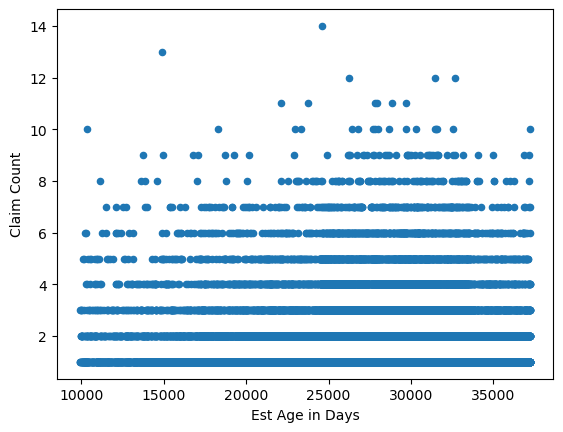

In [7]:
benes[["Est Age in Days", "Claim Count"]].plot.scatter(x = "Est Age in Days", y = "Claim Count")
plt.show()

In [8]:
bene_samp = benes.sample(frac=0.1)

In [133]:
benes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37780 entries, 00013D2EFD8E45D1 to FFFE3ED9582AD46E
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Est Age in Days    37780 non-null  int64  
 1   CLM_PMT_AMT        37780 non-null  float64
 2   Claim Count        37780 non-null  int64  
 3   BENE_SEX_IDENT_CD  37780 non-null  int64  
 4   SP_ALZHDMTA        37780 non-null  int64  
 5   SP_CHF             37780 non-null  int64  
 6   SP_CHRNKIDN        37780 non-null  int64  
 7   SP_CNCR            37780 non-null  int64  
 8   SP_COPD            37780 non-null  int64  
 9   SP_DEPRESSN        37780 non-null  int64  
 10  SP_DIABETES        37780 non-null  int64  
 11  SP_ISCHMCHT        37780 non-null  int64  
 12  SP_OSTEOPRS        37780 non-null  int64  
 13  SP_RA_OA           37780 non-null  int64  
 14  SP_STRKETIA        37780 non-null  int64  
 15  BENE_RACE_CD_1     37780 non-null  int32  
 16  B

## KMeans Clustering

In [50]:
results = kmeans(benes, 6)

In [51]:
kmeans_report(results)

Number of Clusters: 6
Standardized Data: True

Intercluster Distances (Standardized):
          0         1         2         3         4         5
0  0.000000  4.916225  5.678083  5.152793  8.674695  4.383098
1  4.916225  0.000000  4.181231  4.281434  7.852590  2.406770
2  5.678083  4.181231  0.000000  5.199489  7.761836  4.208237
3  5.152793  4.281434  5.199489  0.000000  8.376955  3.512276
4  8.674695  7.852590  7.761836  8.376955  0.000000  7.810640
5  4.383098  2.406770  4.208237  3.512276  7.810640  0.000000

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Cluster: 0
Cluster Size: 2044
Center (Standardized): 0.07655935028378288, 0.12858049209927652, 0.219277369073618, -0.0028409374525079504, 0.3634747084332665, 0.3656687629363804, 0.4006520892404858, 0.10147268013868022, 0.2528603446853687, 0.20477358256102496, 0.3699099666944583, 0.3255207653393684, 0.17452007975462

In [53]:
results['clustered original data']

Est Age in Days  CLM_PMT_AMT  Claim Count  \
DESYNPUF_ID                                                   
00013D2EFD8E45D1            32021       4000.0            1   
00016F745862898F            24836      52000.0            4   
00052705243EA128            28003      14000.0            1   
0007F12A492FD25D            33359      53000.0            4   
000B97BA2314E971            26572       2000.0            1   
...                           ...          ...          ...   
FFF5F9218AB04A41            20910       9000.0            2   
FFF8B49458F9FFA7            33237      13000.0            2   
FFFA950301FCA748            18811       7000.0            1   
FFFC880E13CA6278            27058      10000.0            1   
FFFE3ED9582AD46E            34546       2000.0            1   

                  BENE_SEX_IDENT_CD  SP_ALZHDMTA  SP_CHF  SP_CHRNKIDN  \
DESYNPUF_ID                                                             
00013D2EFD8E45D1                  1            0       1            0   
00016F745862898F                  1            1       1            1   
00052705243EA128                  1            0       0            1   
0007F12A492FD25D                  0            0       1            1   
000B97BA2314E971                  1            0       0            0   
...                             ...          ...     ...          ...   
FFF5F9218AB04A41                  0            0       0            0   
FFF8B49458F9FFA7                  0            1       1            1   
FFFA950301FCA748                  1            0       0            0   
FFFC880E13CA6278                  0            0       0            0   
FFFE3ED9582AD46E                  0            0       0            0   

                  SP_CNCR  SP_COPD  SP_DEPRESSN  SP_DIABETES  SP_ISCHMCHT  \
DESYNPUF_ID                                                                 
00013D2EFD8E45D1        0        0            0            0            0   
00016F745862898F        0        0            0            1            0   
00052705243EA128        1        0            0            1            1   
0007F12A492FD25D        0        1            1            1            1   
000B97BA2314E971        0        0            0            0            0   
...                   ...      ...          ...          ...          ...   
FFF5F9218AB04A41        0        0            0            0            0   
FFF8B49458F9FFA7        0        0            0            0            1   
FFFA950301FCA748        0        0            1            1            1   
FFFC880E13CA6278        0        0            0            0            0   
FFFE3ED9582AD46E        0        0            0            1            0   

                  SP_OSTEOPRS  SP_RA_OA  SP_STRKETIA  BENE_RACE_CD_1  \
DESYNPUF_ID                                                            
00013D2EFD8E45D1            1         0            0               1   
00016F745862898F            0         0            0               1   
00052705243EA128            0         0            0               1   
0007F12A492FD25D            0         0            0               0   
000B97BA2314E971            1         0            0               1   
...                       ...       ...          ...             ...   
FFF5F9218AB04A41            0         0            0               1   
FFF8B49458F9FFA7            0         0            0               1   
FFFA950301FCA748            1         0            0               1   
FFFC880E13CA6278            0         0            0               1   
FFFE3ED9582AD46E            1         0            0               1   

                  BENE_RACE_CD_2  BENE_RACE_CD_3  BENE_RACE_CD_5  cluster  
DESYNPUF_ID                                                                
00013D2EFD8E45D1               0               0               0        1  
00016F745862898F               0               0               0        3  
00052

In [55]:
plot_df = pd.concat([bene_2010, bene_2009, bene_2008])
plot_df = plot_df[~plot_df.index.duplicated(keep='first')]
plot_df = plot_df.merge(how = "right", right=ip_claims, left_index=True, right_index=True)
plot_df["Est Age in Days"] = (plot_df["Year"] - plot_df["BENE_BIRTH_DT"]).apply(lambda x: x.days)
plot_df["BENE_RACE_CD"] = plot_df["BENE_RACE_CD"].astype(str)
plot_df = plot_df[["Est Age in Days", "CLM_PMT_AMT", "Claim Count", "BENE_RACE_CD", "BENE_SEX_IDENT_CD",
               "SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]]
plot_df['cluster'] = results['clustered original data']['cluster']
plot_df

Est Age in Days  CLM_PMT_AMT  Claim Count BENE_RACE_CD  \
DESYNPUF_ID                                                                
00013D2EFD8E45D1            32021       4000.0            1            1   
00016F745862898F            24836      52000.0            4            1   
00052705243EA128            28003      14000.0            1            1   
0007F12A492FD25D            33359      53000.0            4            2   
000B97BA2314E971            26572       2000.0            1            1   
...                           ...          ...          ...          ...   
FFF5F9218AB04A41            20910       9000.0            2            1   
FFF8B49458F9FFA7            33237      13000.0            2            1   
FFFA950301FCA748            18811       7000.0            1            1   
FFFC880E13CA6278            27058      10000.0            1            1   
FFFE3ED9582AD46E            34546       2000.0            1            1   

                  BENE_SEX_IDENT_CD  SP_ALZHDMTA  SP_CHF  SP_CHRNKIDN  \
DESYNPUF_ID                                                             
00013D2EFD8E45D1                  1            2       1            2   
00016F745862898F                  1            1       1            1   
00052705243EA128                  1            2       2            1   
0007F12A492FD25D                  2            2       1            1   
000B97BA2314E971                  1            2       2            2   
...                             ...          ...     ...          ...   
FFF5F9218AB04A41                  2            2       2            2   
FFF8B49458F9FFA7                  2            1       1            1   
FFFA950301FCA748                  1            2       2            2   
FFFC880E13CA6278                  2            2       2            2   
FFFE3ED9582AD46E                  2            2       2            2   

                  SP_CNCR  SP_COPD  SP_DEPRESSN  SP_DIABETES  SP_ISCHMCHT  \
DESYNPUF_ID                                                                 
00013D2EFD8E45D1        2        2            2            2            2   
00016F745862898F        2        2            2            1            2   
00052705243EA128        1        2            2            1            1   
0007F12A492FD25D        2        1            1            1            1   
000B97BA2314E971        2        2            2            2            2   
...                   ...      ...          ...          ...          ...   
FFF5F9218AB04A41        2        2            2            2            2   
FFF8B49458F9FFA7        2        2            2            2            1   
FFFA950301FCA748        2        2            1            1            1   
FFFC880E13CA6278        2        2            2            2            2   
FFFE3ED9582AD46E        2        2            2            1            2   

                  SP_OSTEOPRS  SP_RA_OA  SP_STRKETIA  cluster  
DESYNPUF_ID                                                    
00013D2EFD8E45D1            1         2            2        1  
00016F745862898F            2         2            2        3  
00052705243EA128            2         2            2        5  
0007F12A492FD25D            2         2            2        3  
000B97BA2314E971            1         2            2        1  
...                       ...       ...          ...      ...  
FFF5F9218AB04A41            2         2            2        1  
FFF8B49458F9FFA7            2         2            2        5  
FFFA950301FCA748            1         2            2        5  
FFFC880E13CA6278            2         2            2        1  
FFFE3ED9582AD46E            1         2            2        1  

[37780 rows x 17 columns]

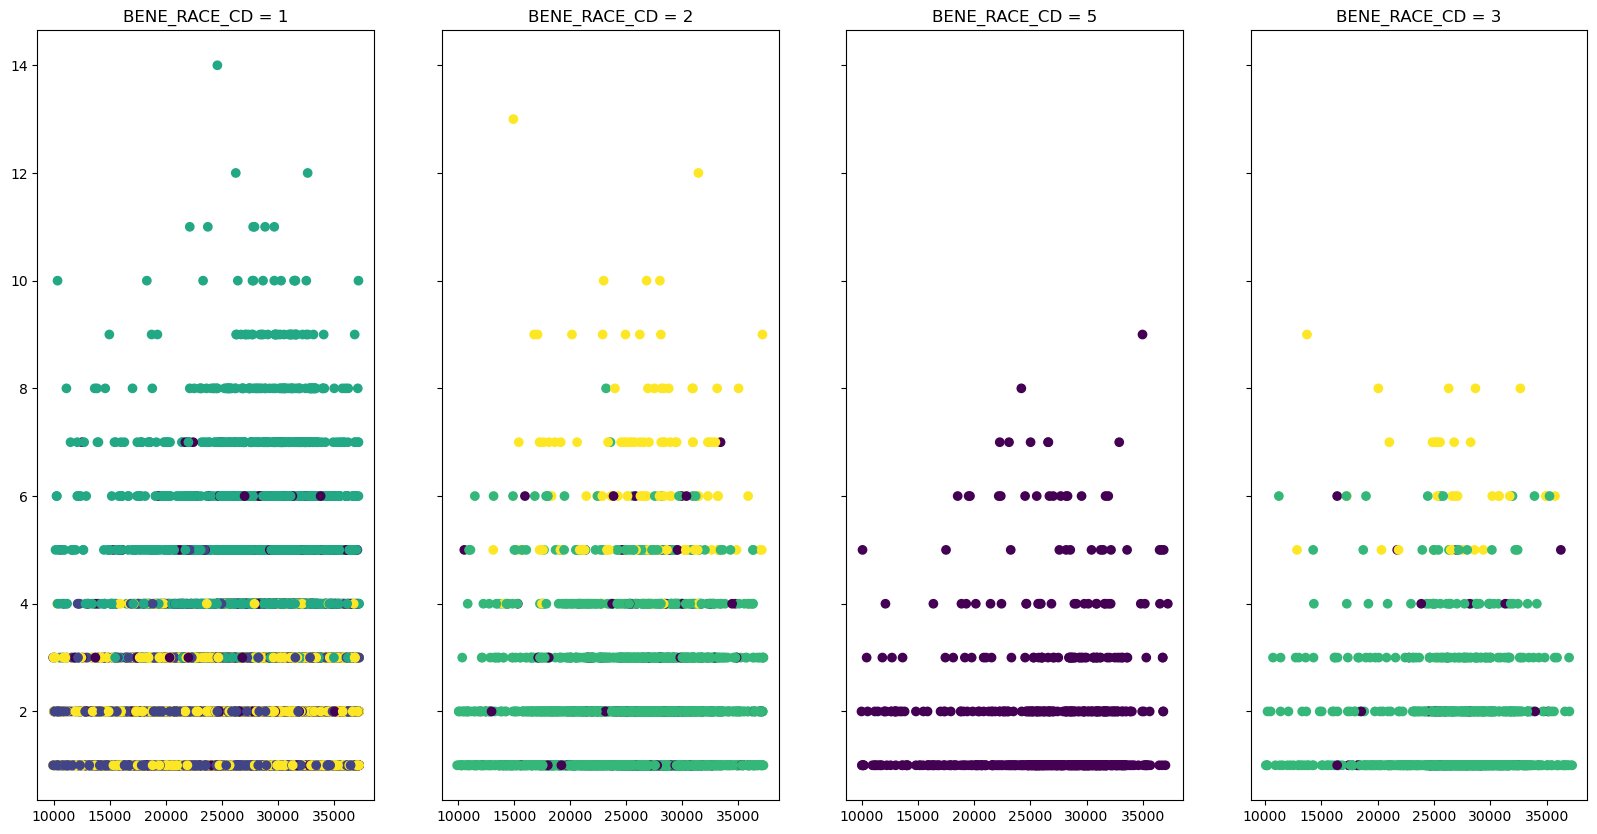

In [134]:
rs = plot_df["BENE_RACE_CD"].unique()
fig, axs = plt.subplots(1, len(rs), sharey=True, figsize=(20, 10))
for i, r in enumerate(rs):
    ax = axs[i]
    subset = plot_df[(plot_df["BENE_RACE_CD"] == r)]
    ax.scatter(subset["Est Age in Days"], subset["Claim Count"], c=subset["cluster"])
    ax.set_title(f"BENE_RACE_CD = {r}")
plt.show()

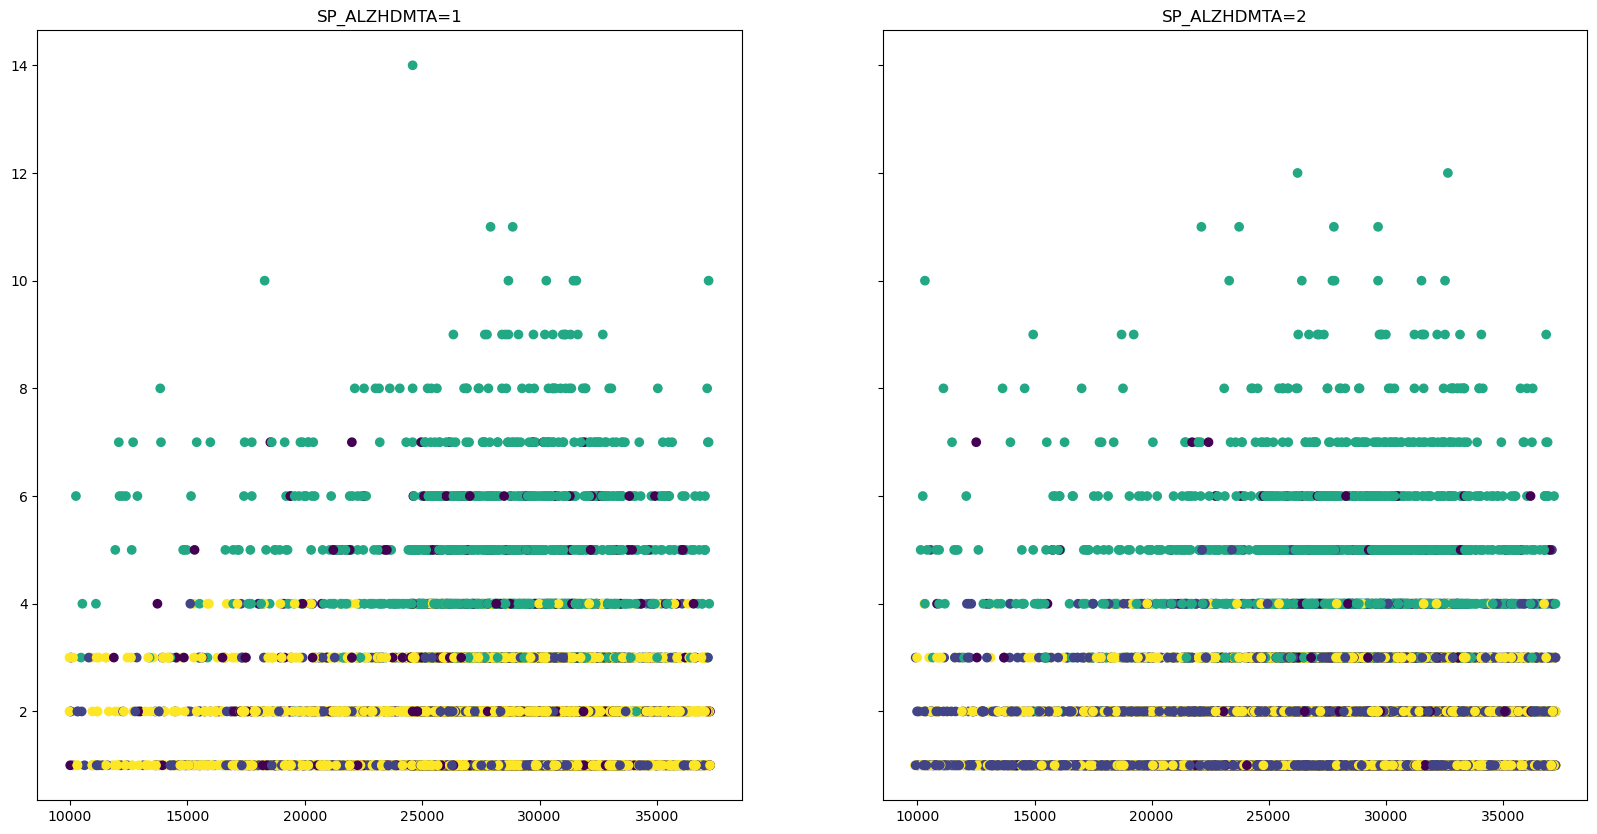

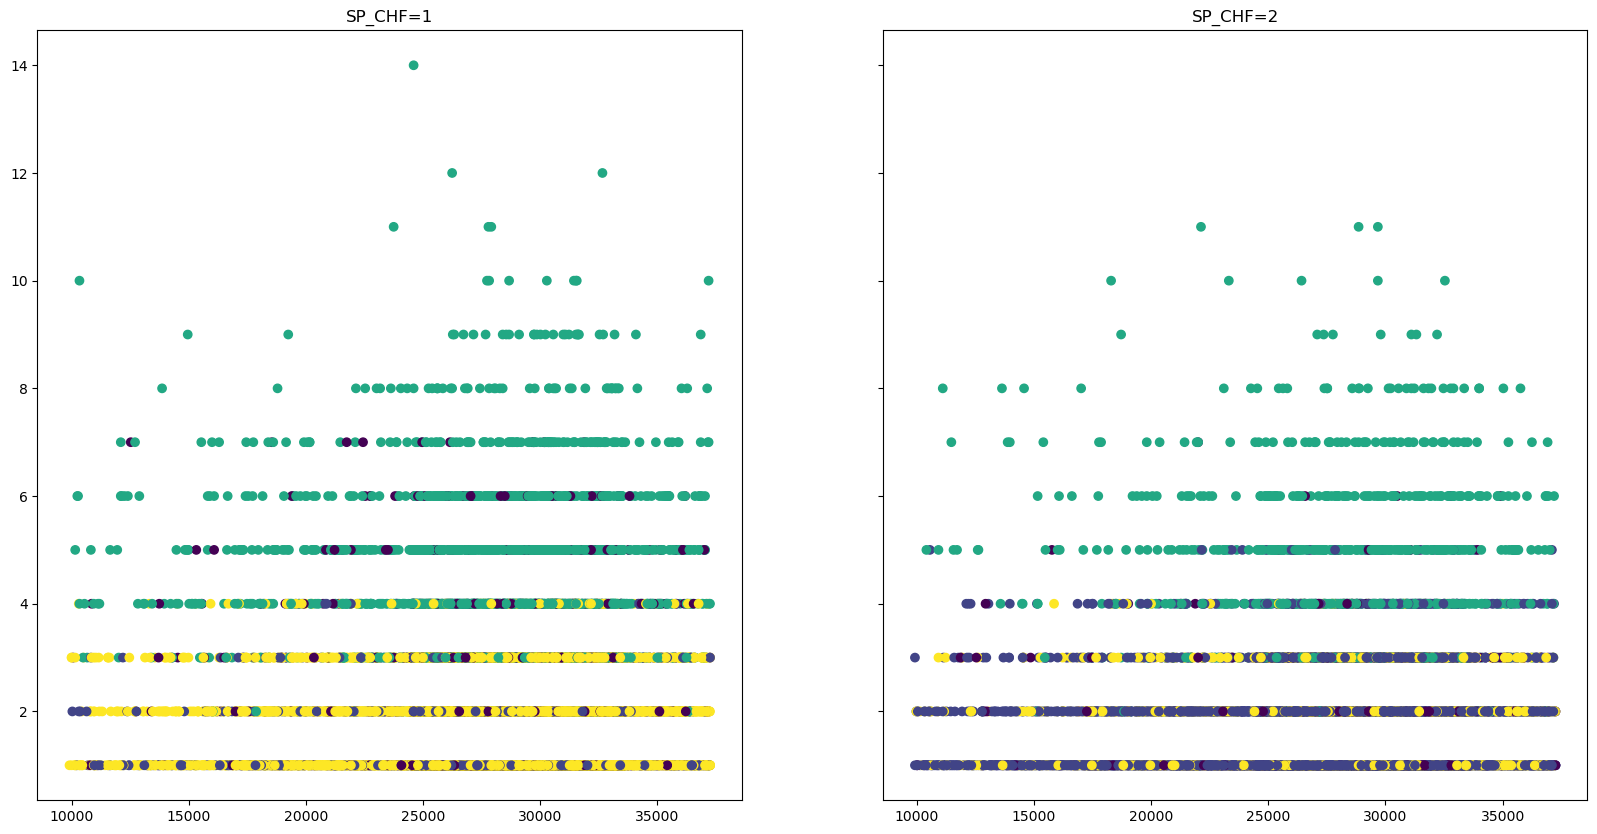

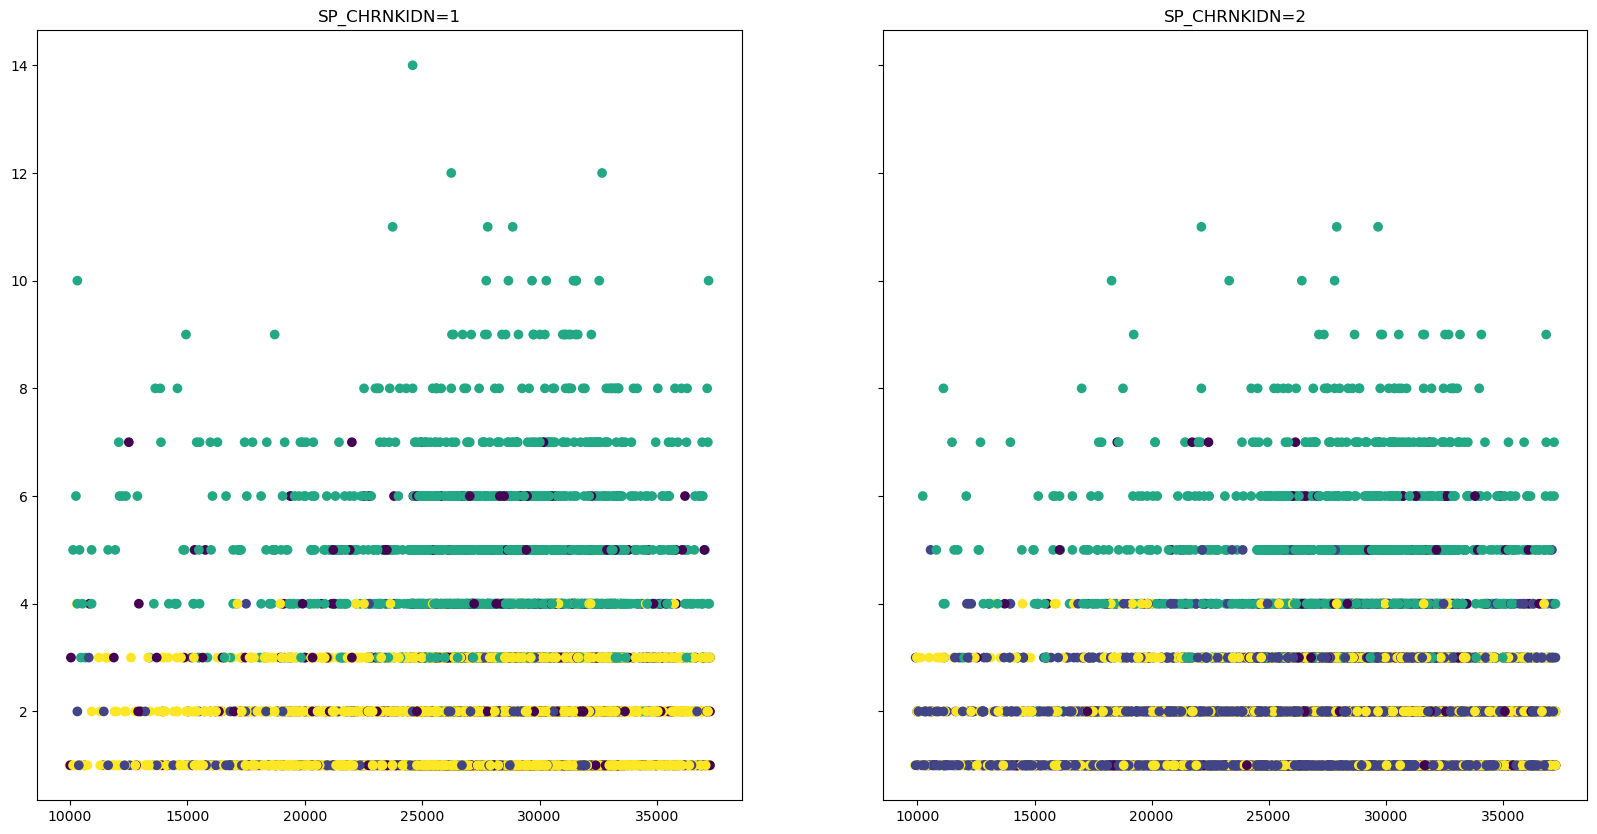

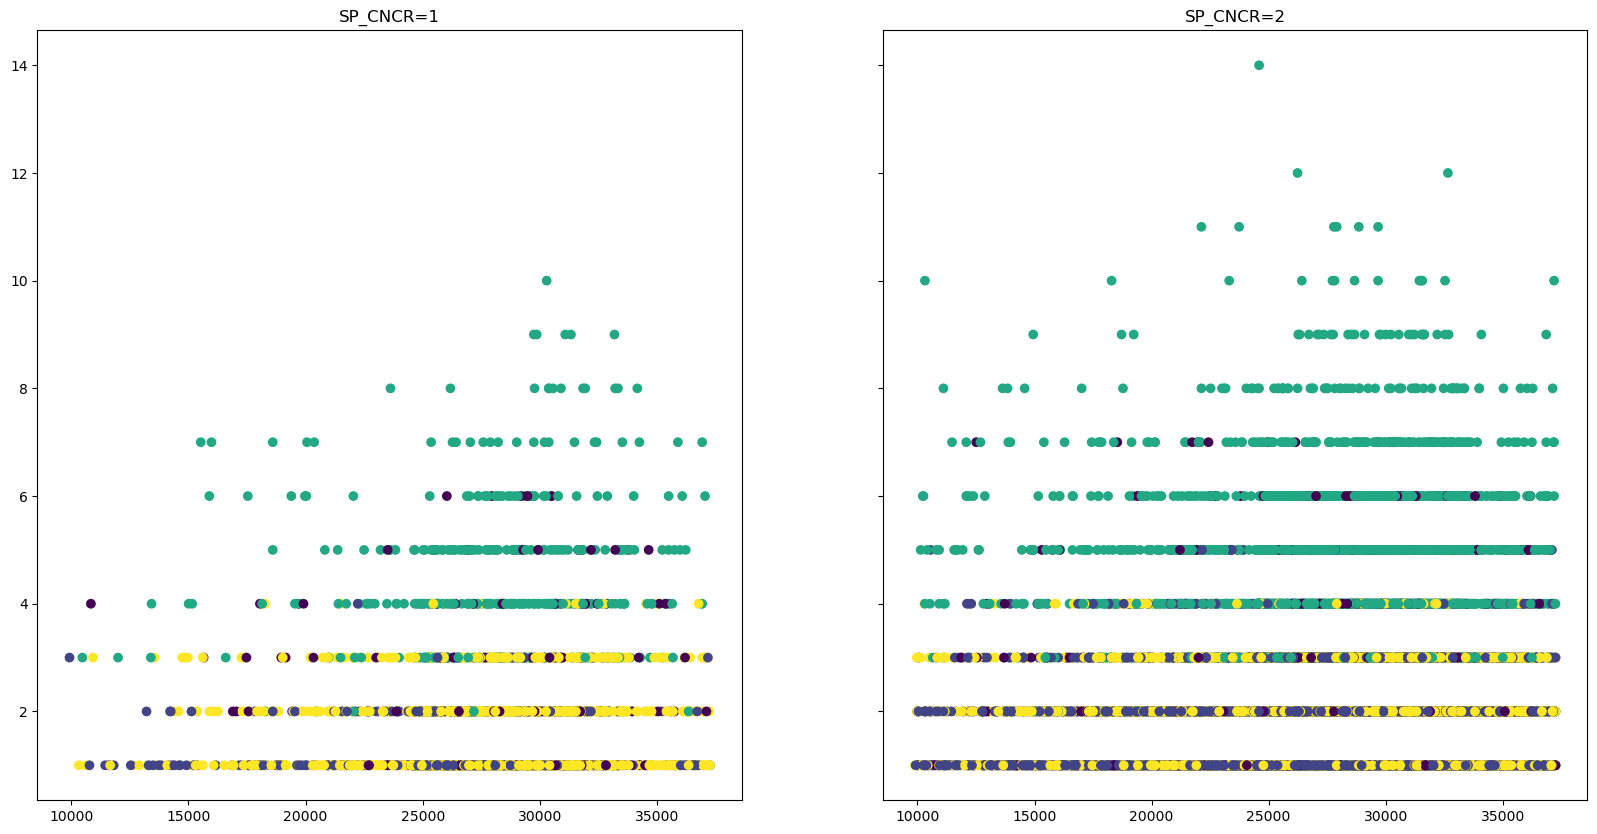

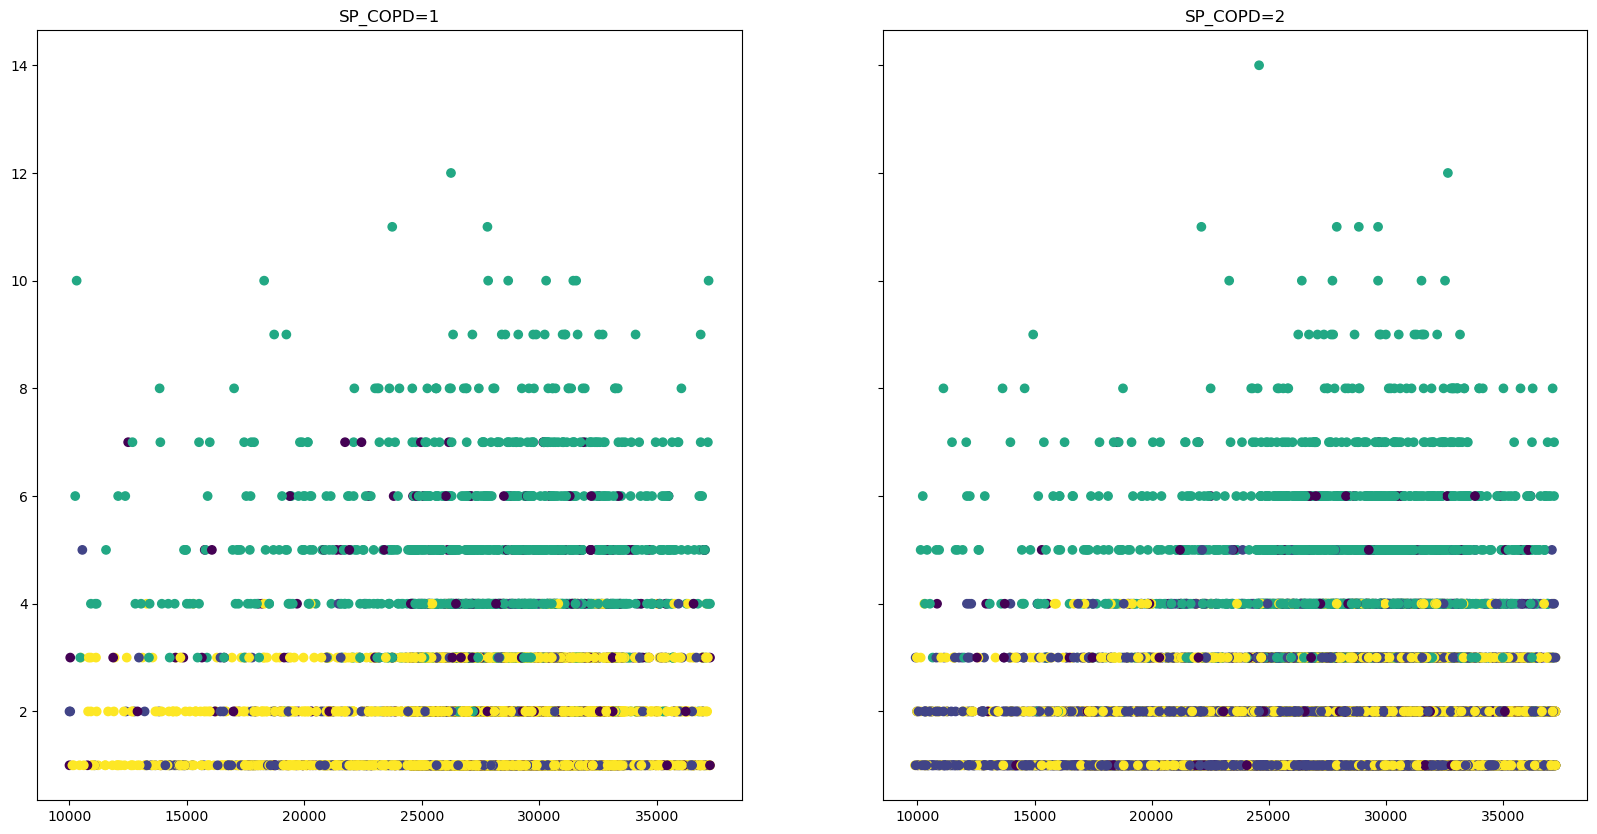

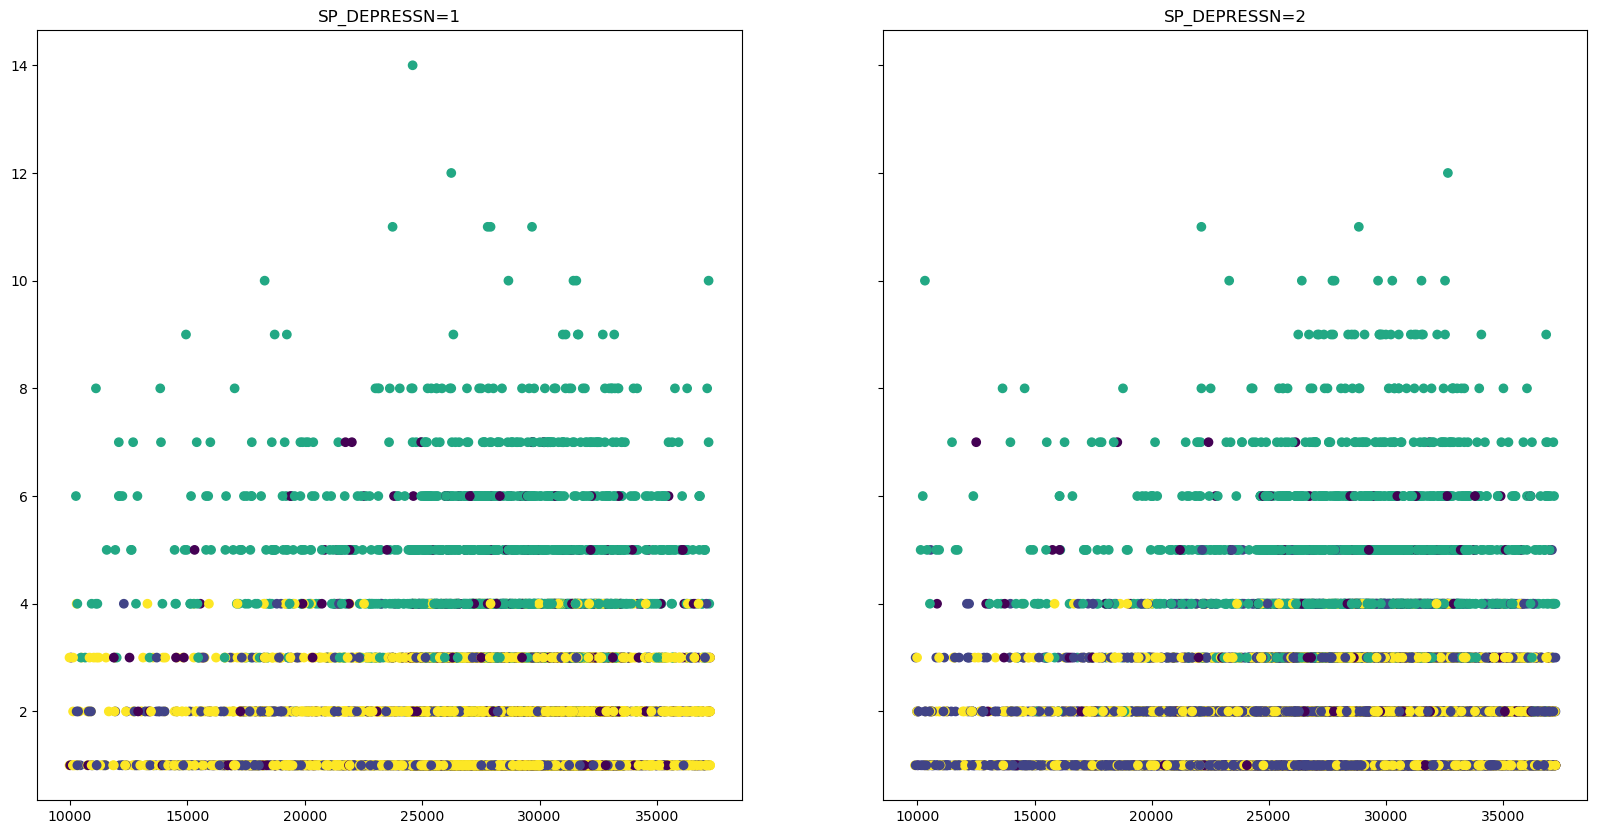

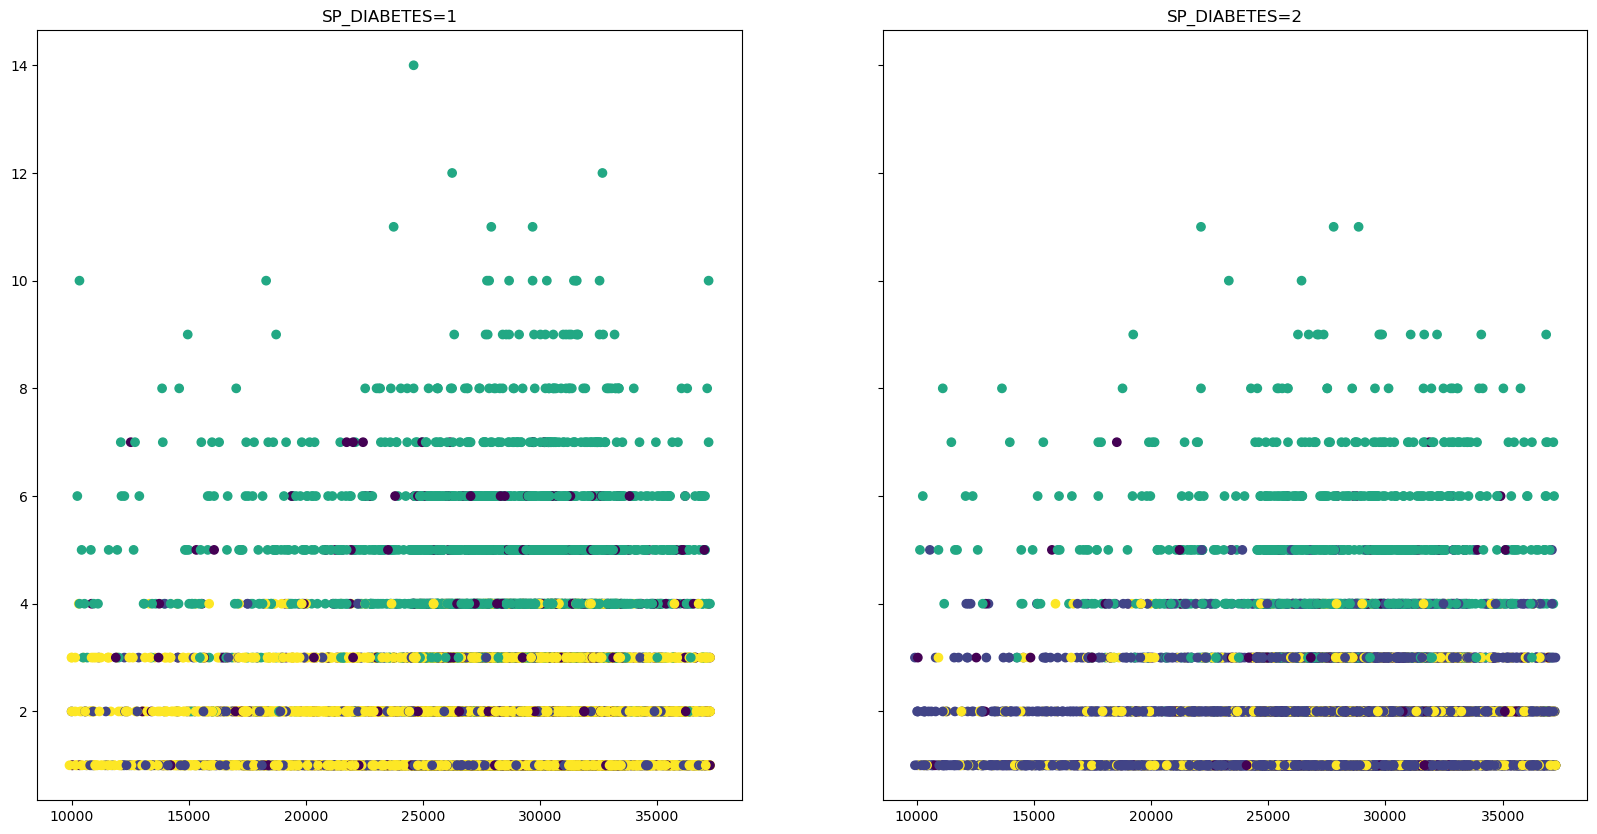

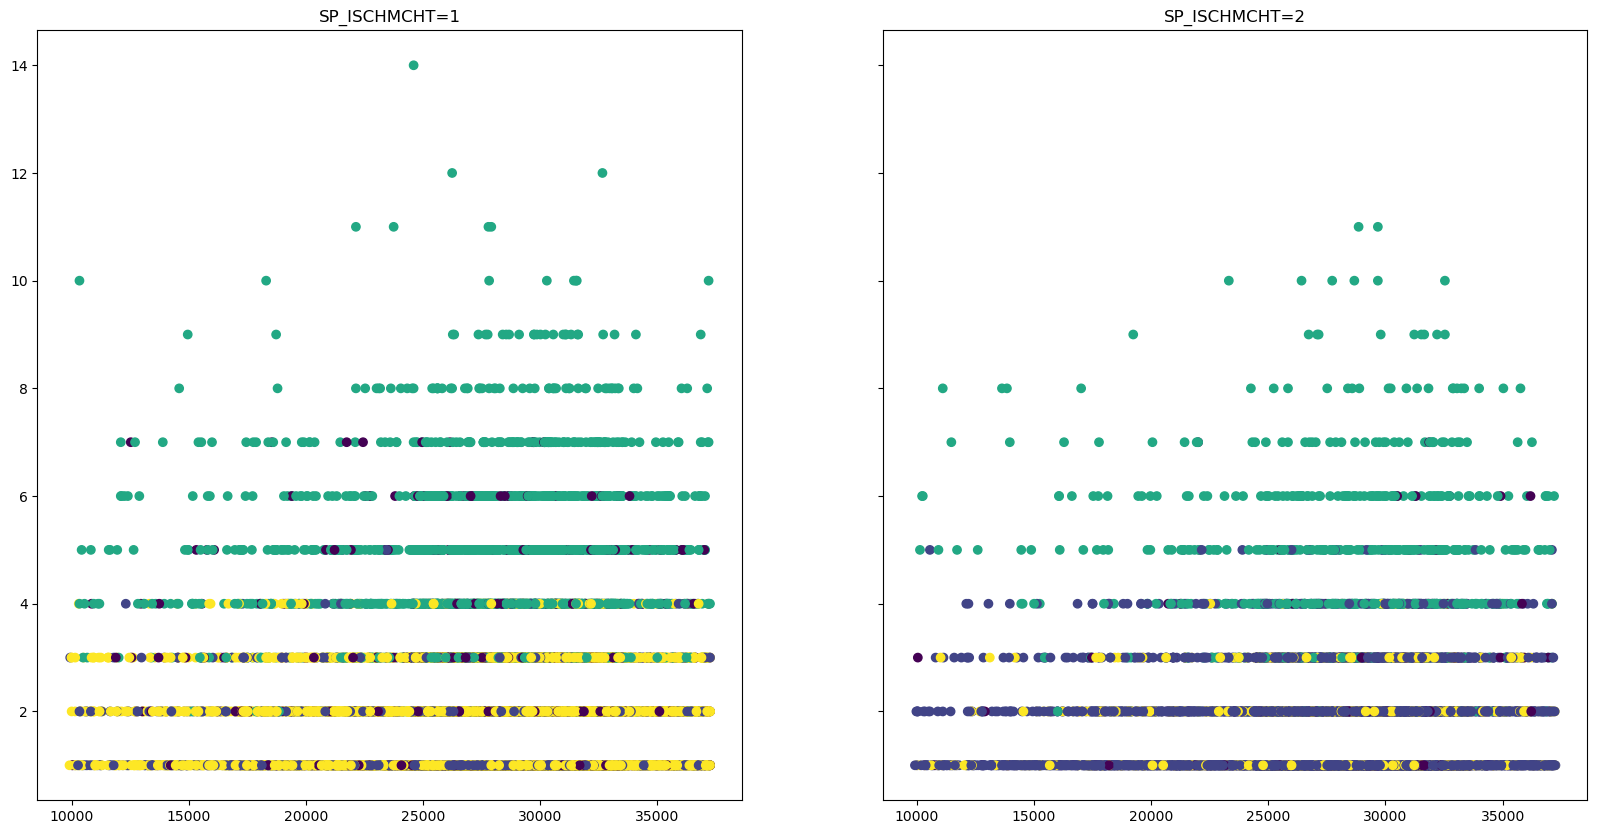

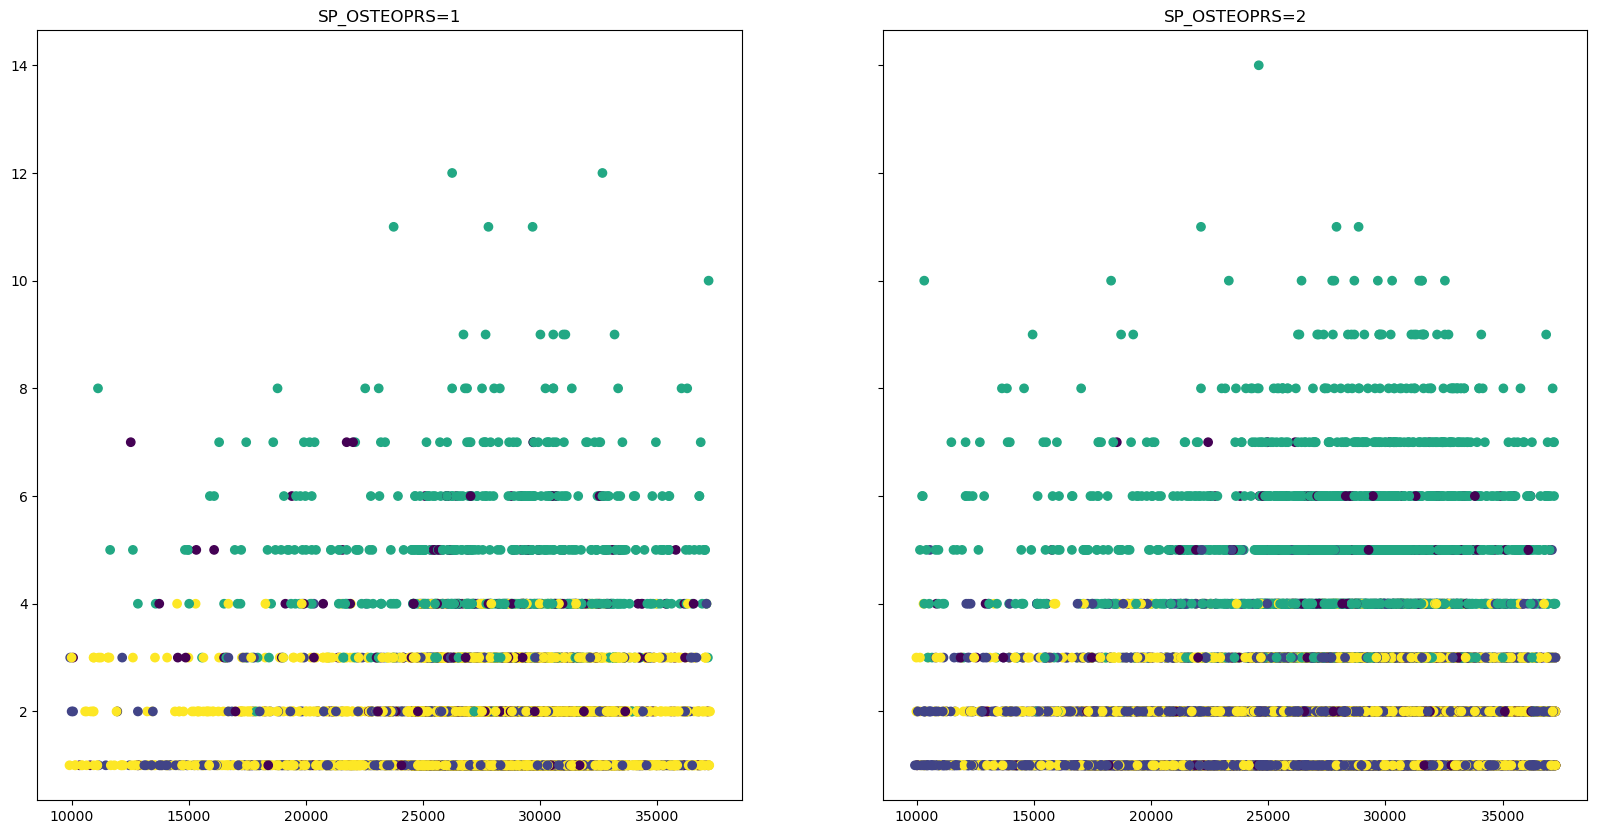

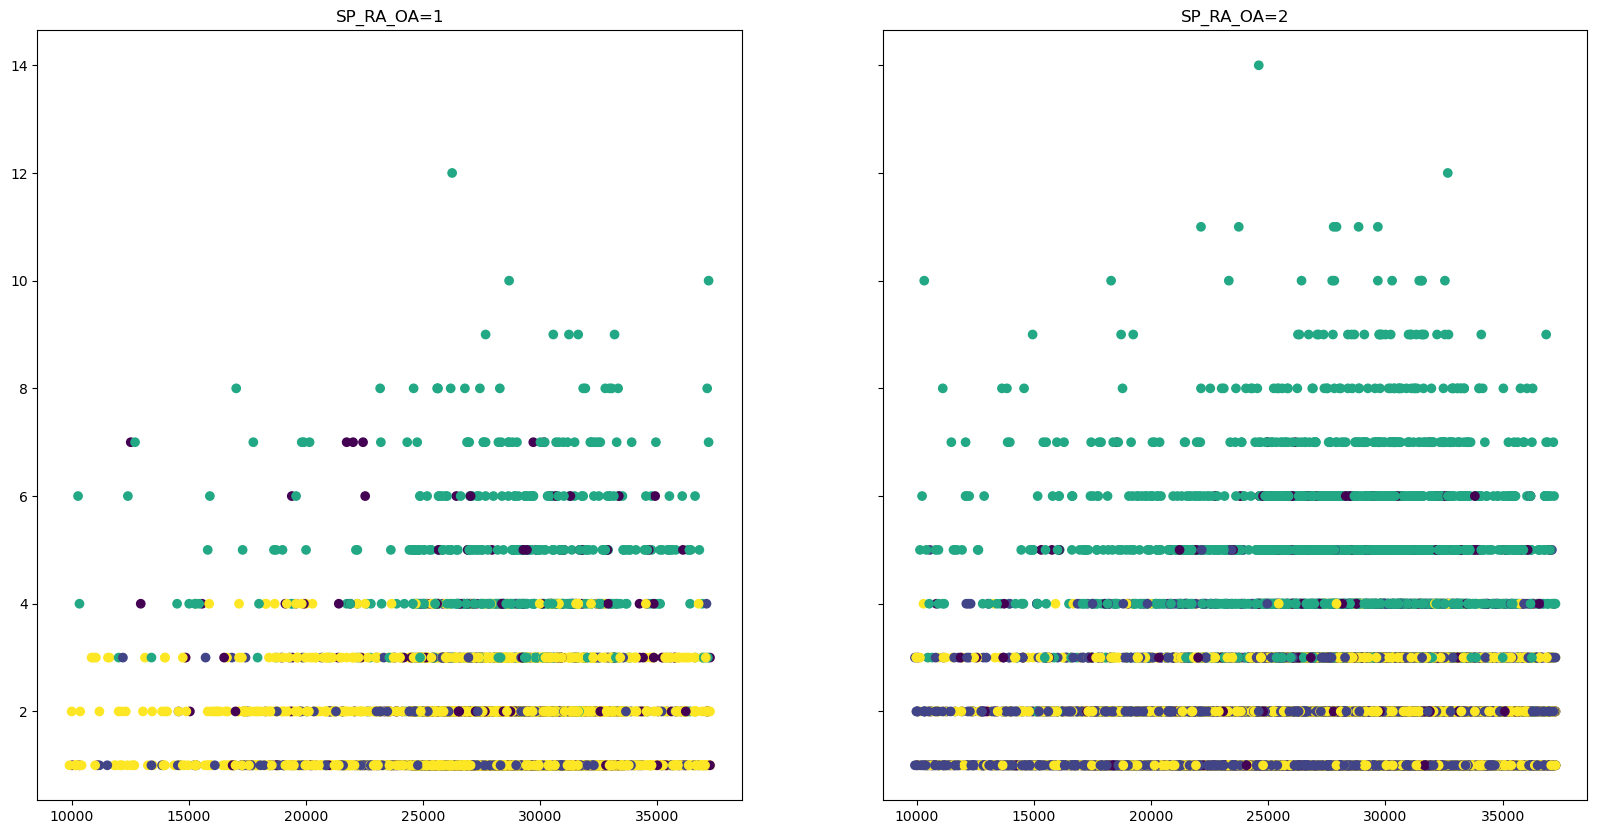

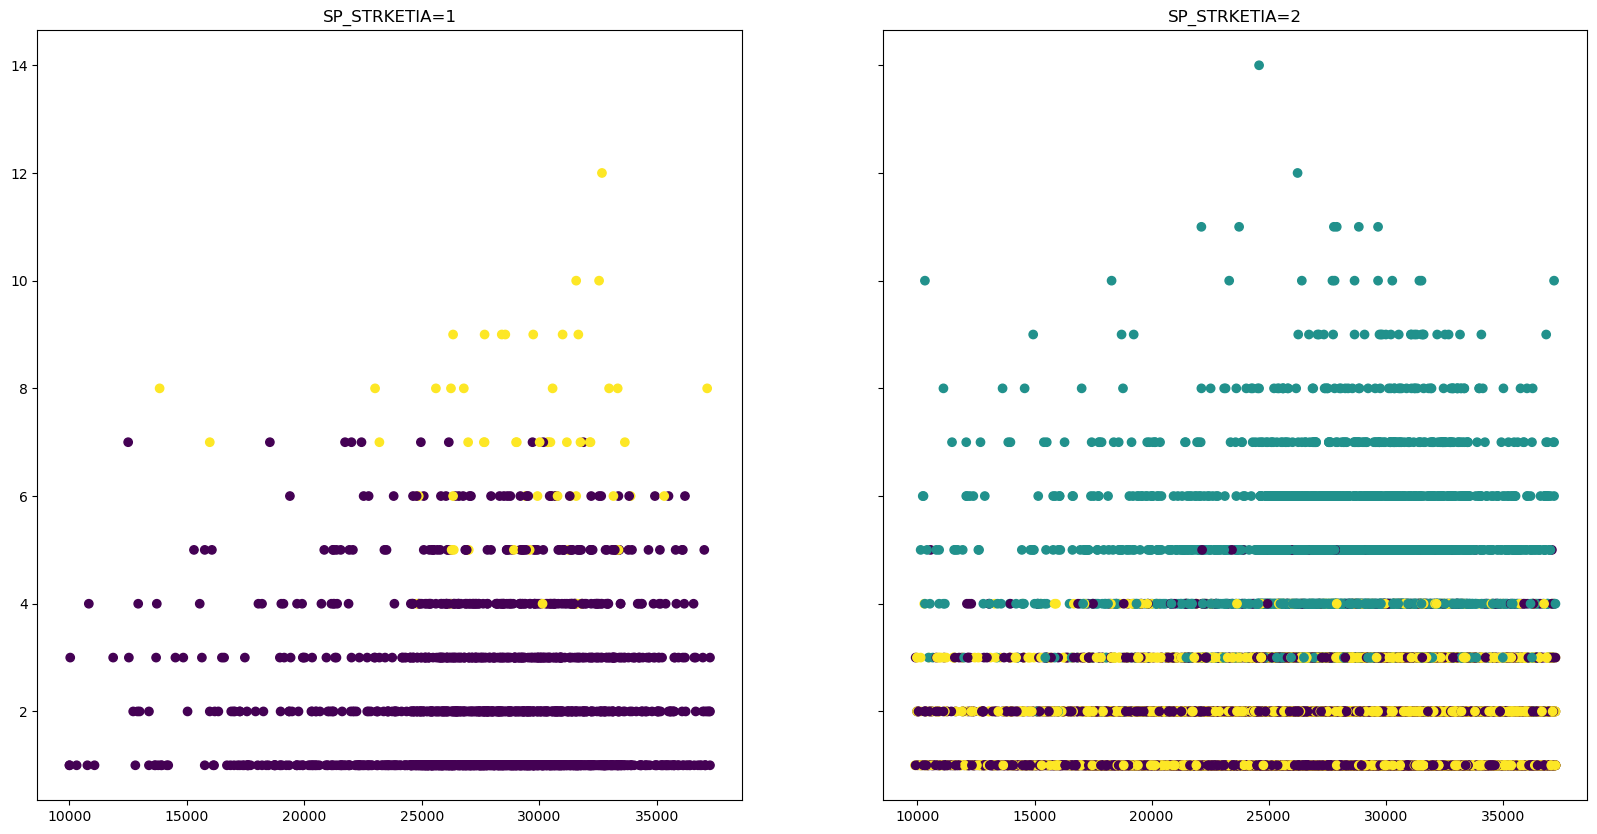

In [136]:
conds = ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]
for cond in conds:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
    for i, r in enumerate([1, 2]):
        ax = axs[i]
        subset = plot_df[(plot_df[cond] == r) & (plot_df["BENE_RACE_CD"] == "1")]
        ax.scatter(subset["Est Age in Days"], subset["Claim Count"], c=subset["cluster"])
        ax.set_title(f"{cond}={r}")
    plt.show()

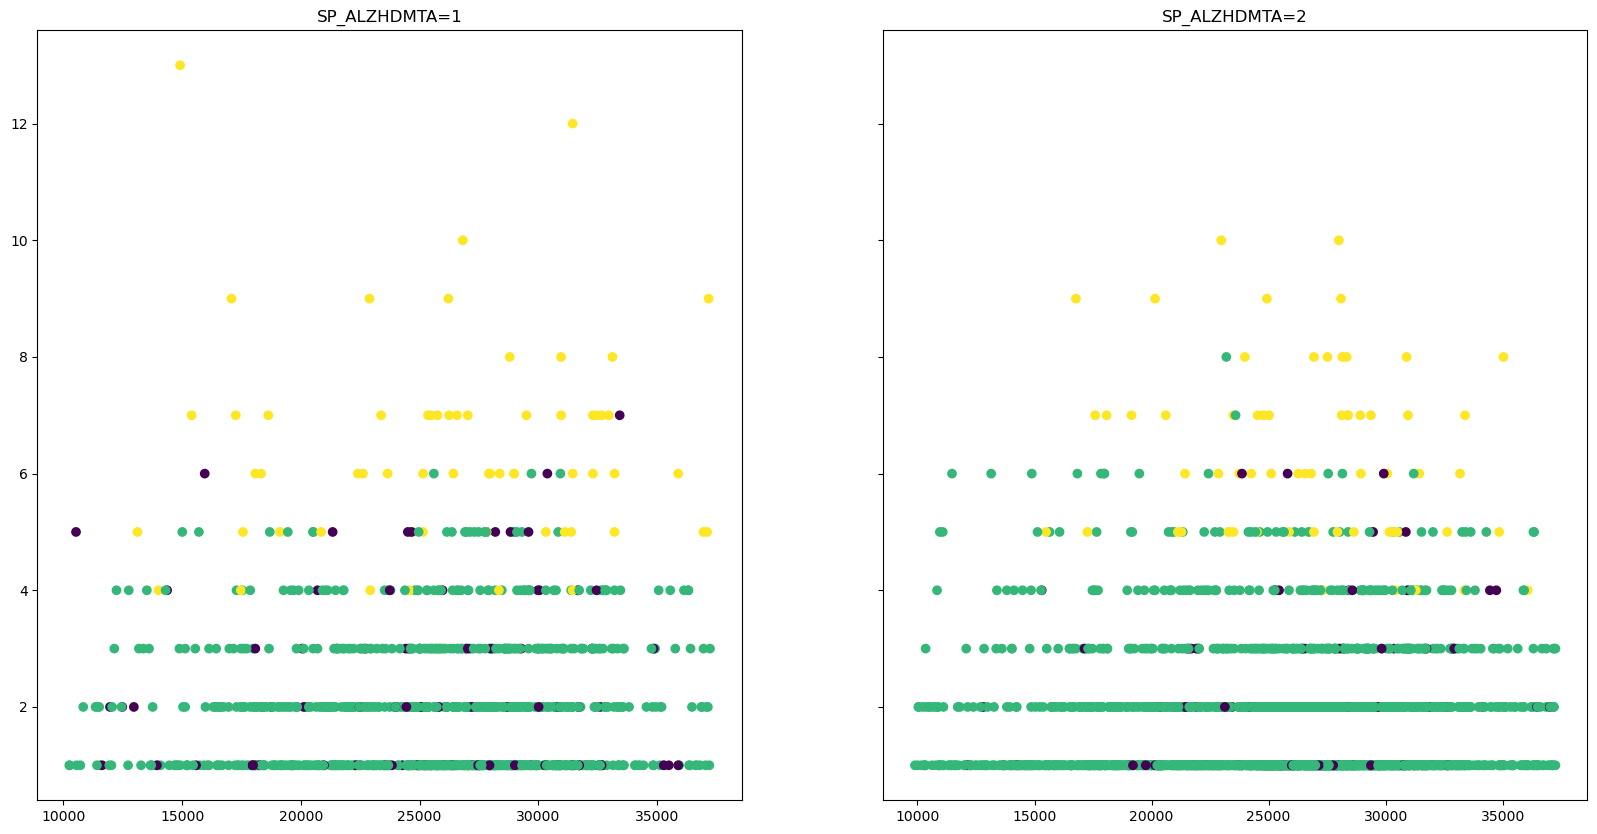

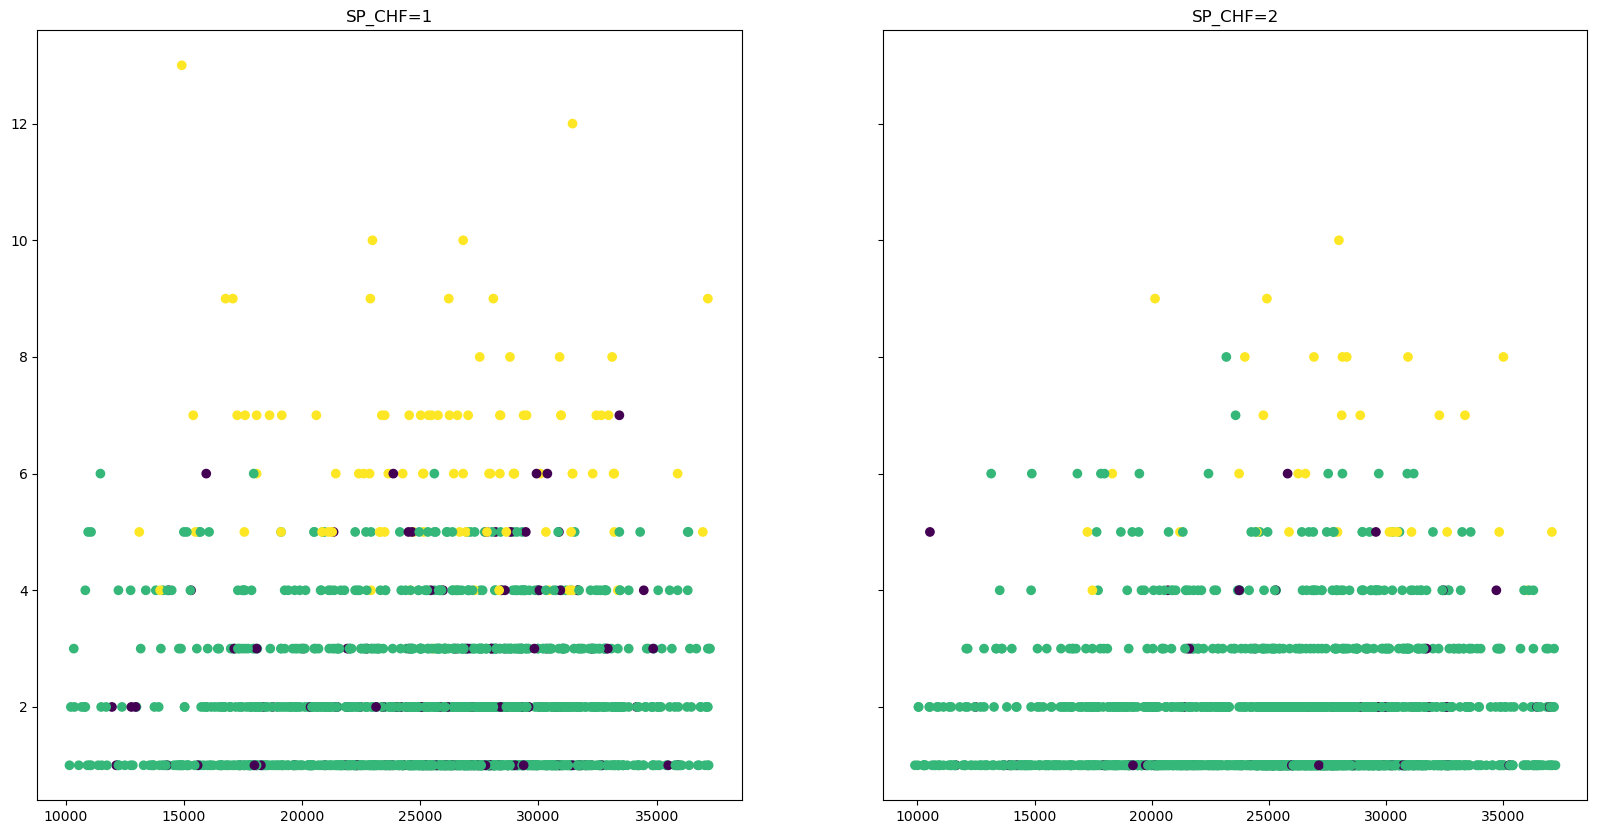

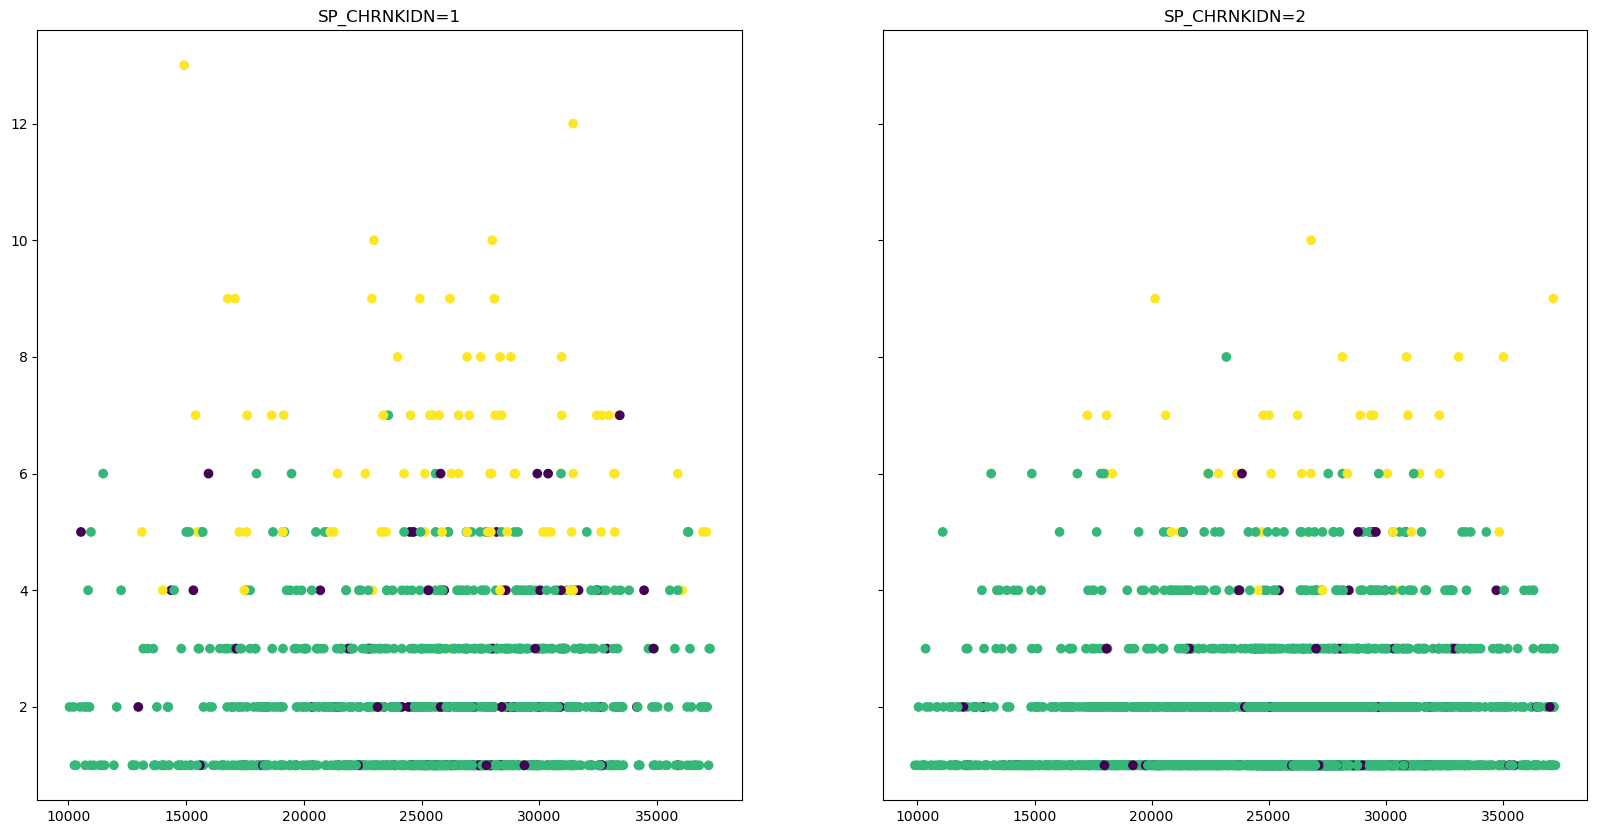

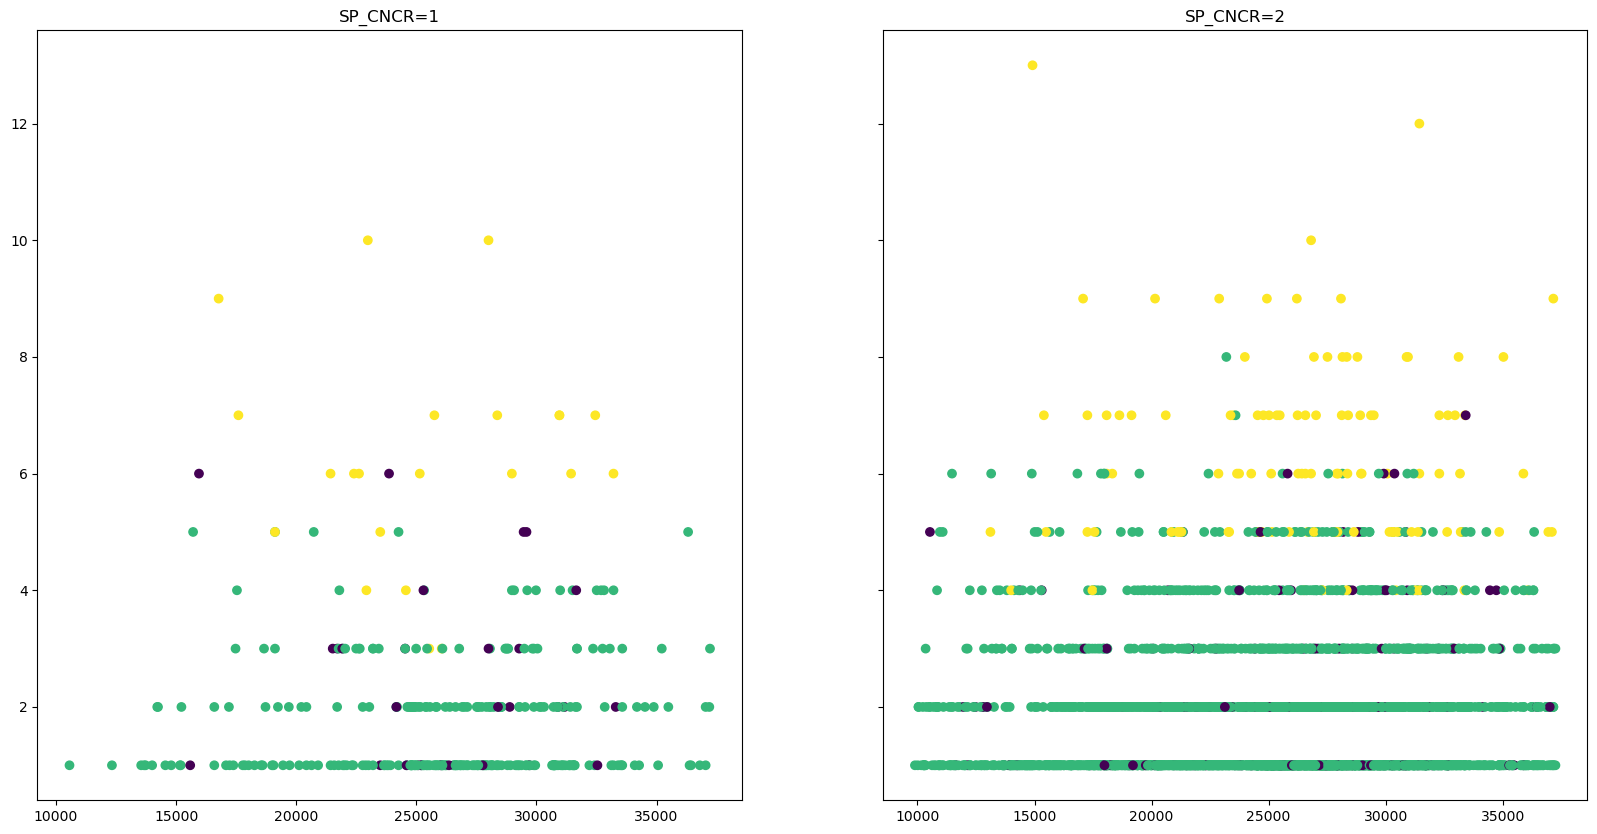

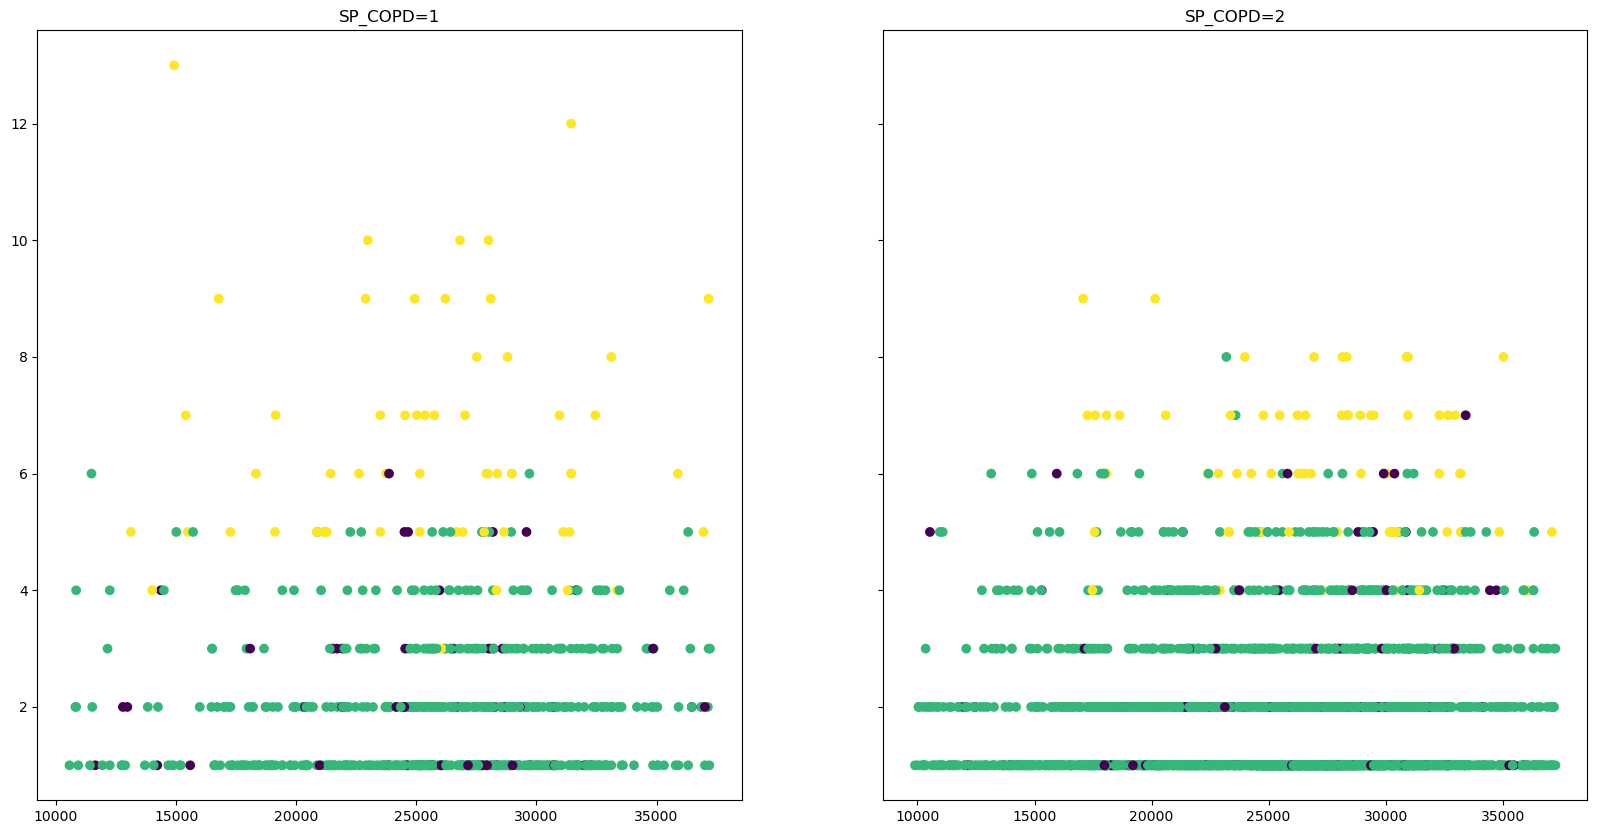

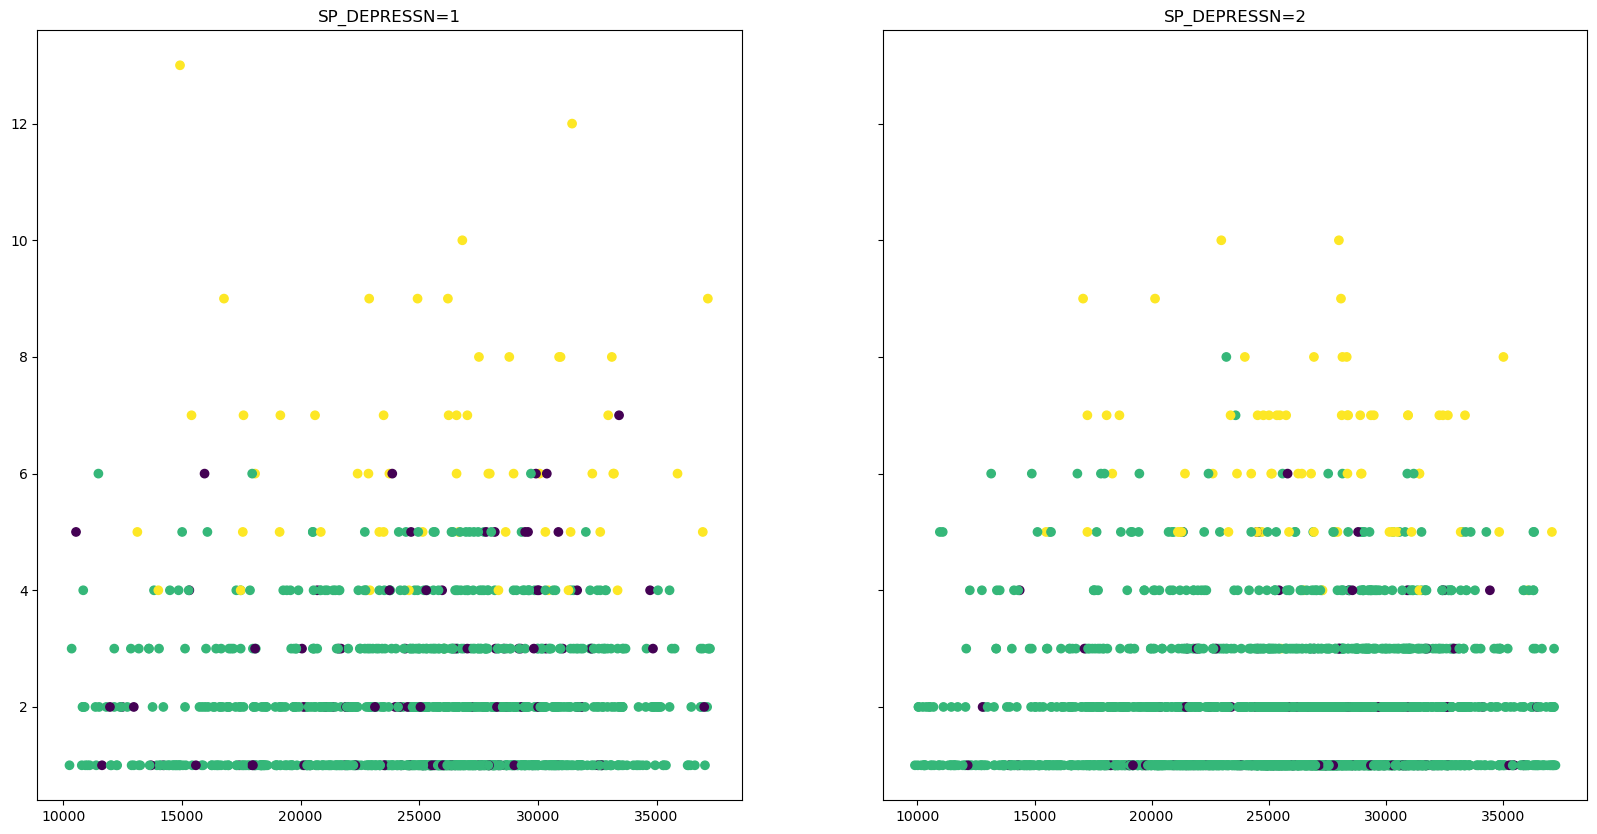

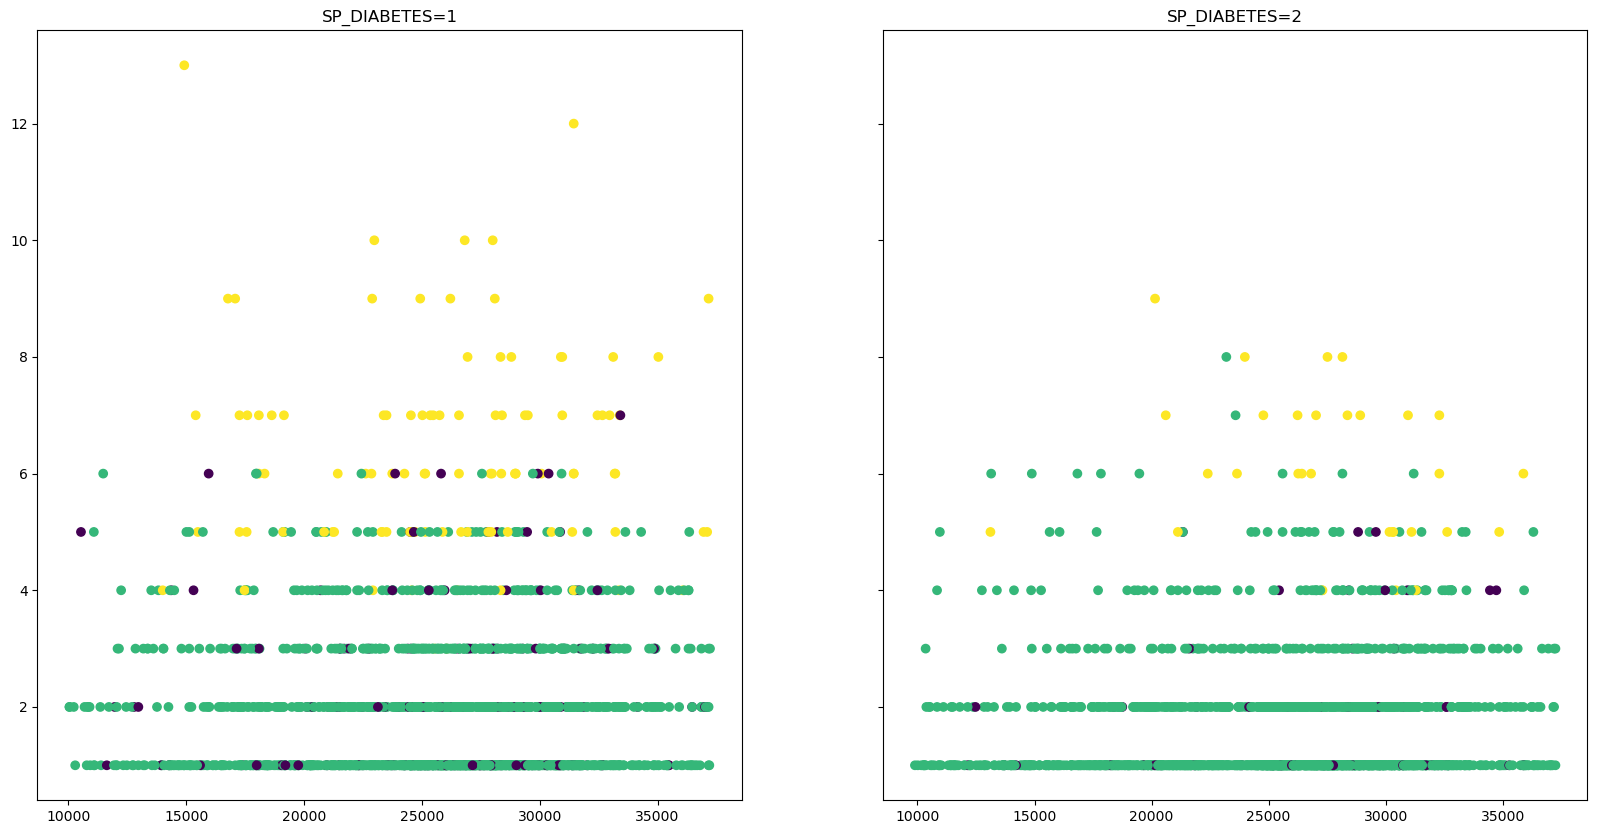

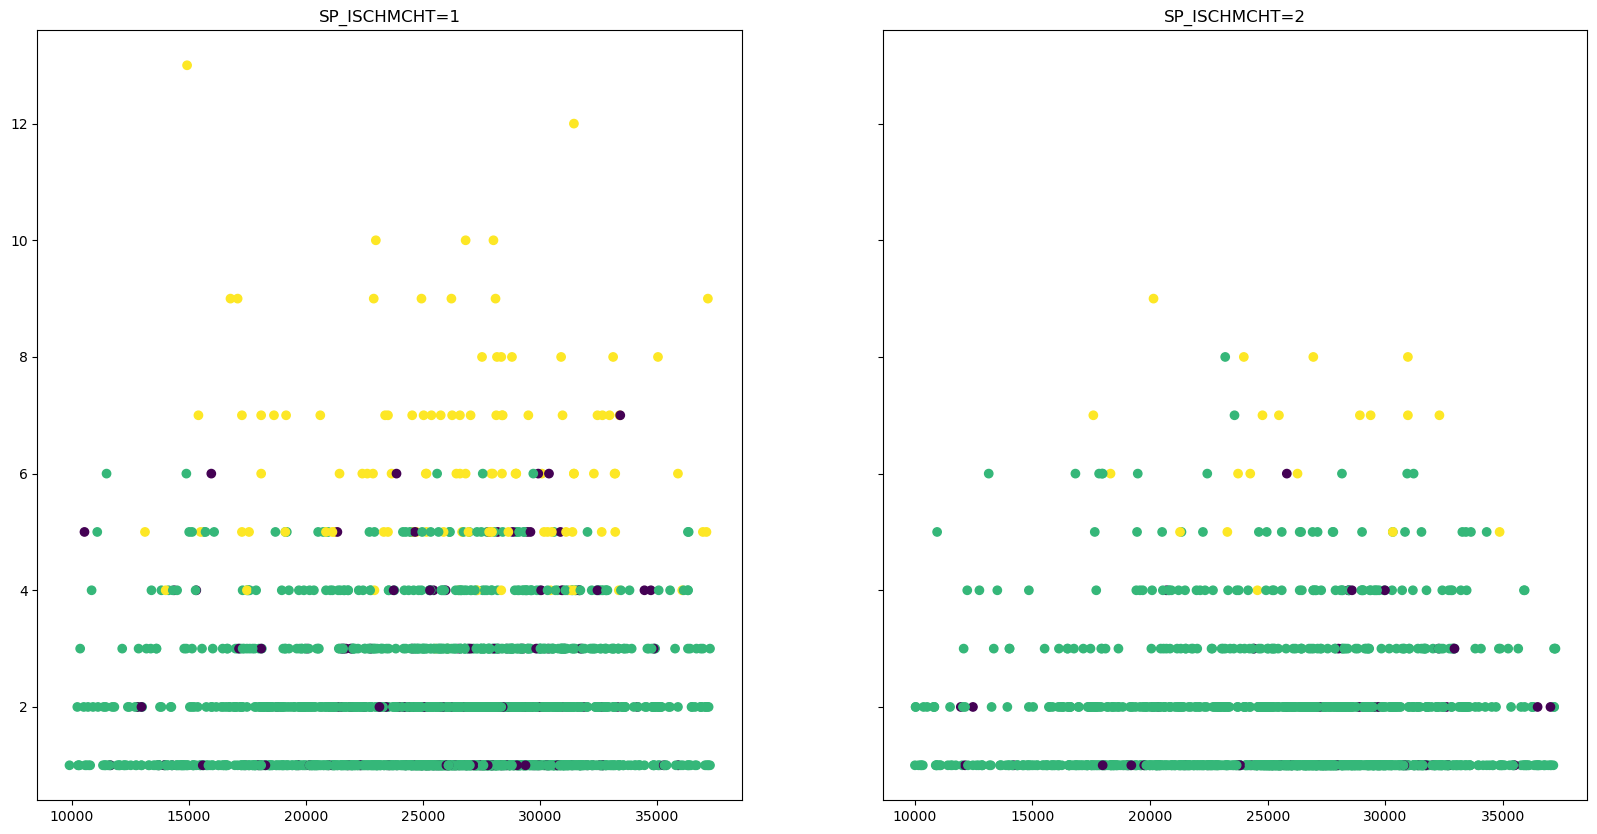

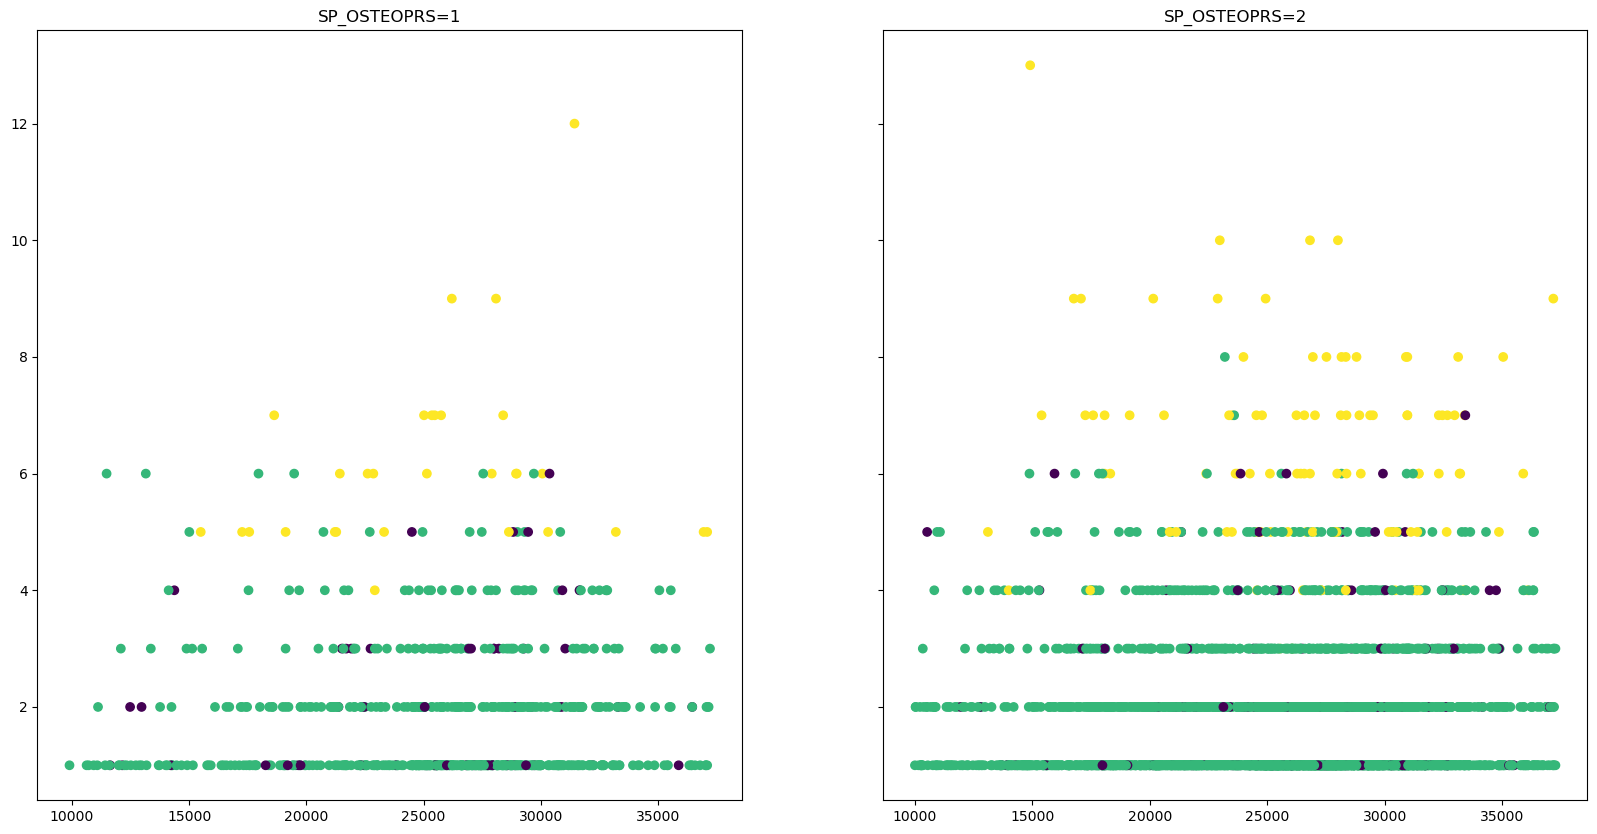

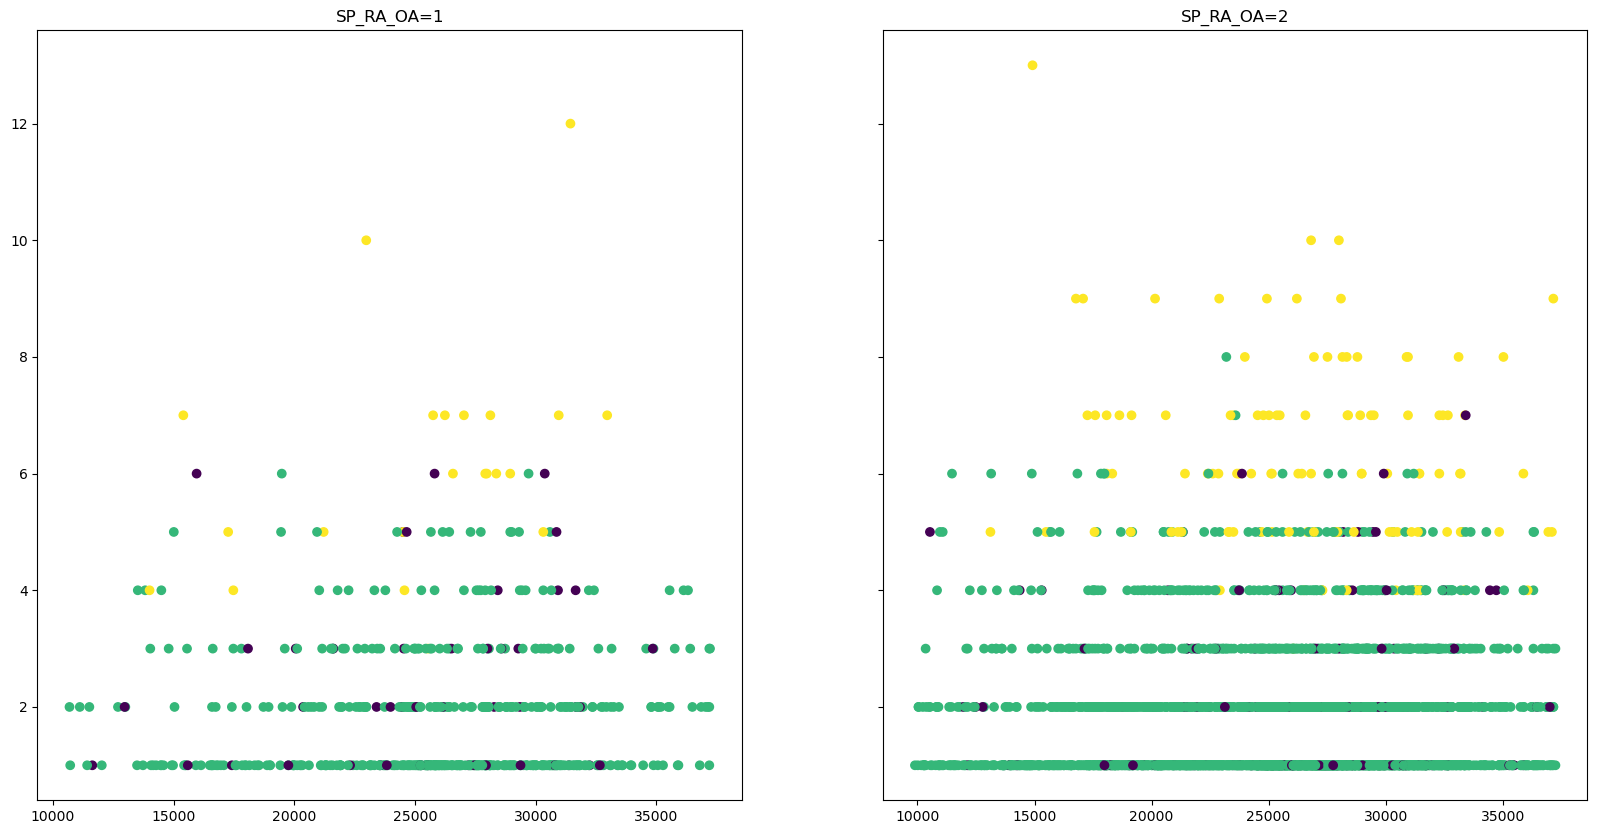

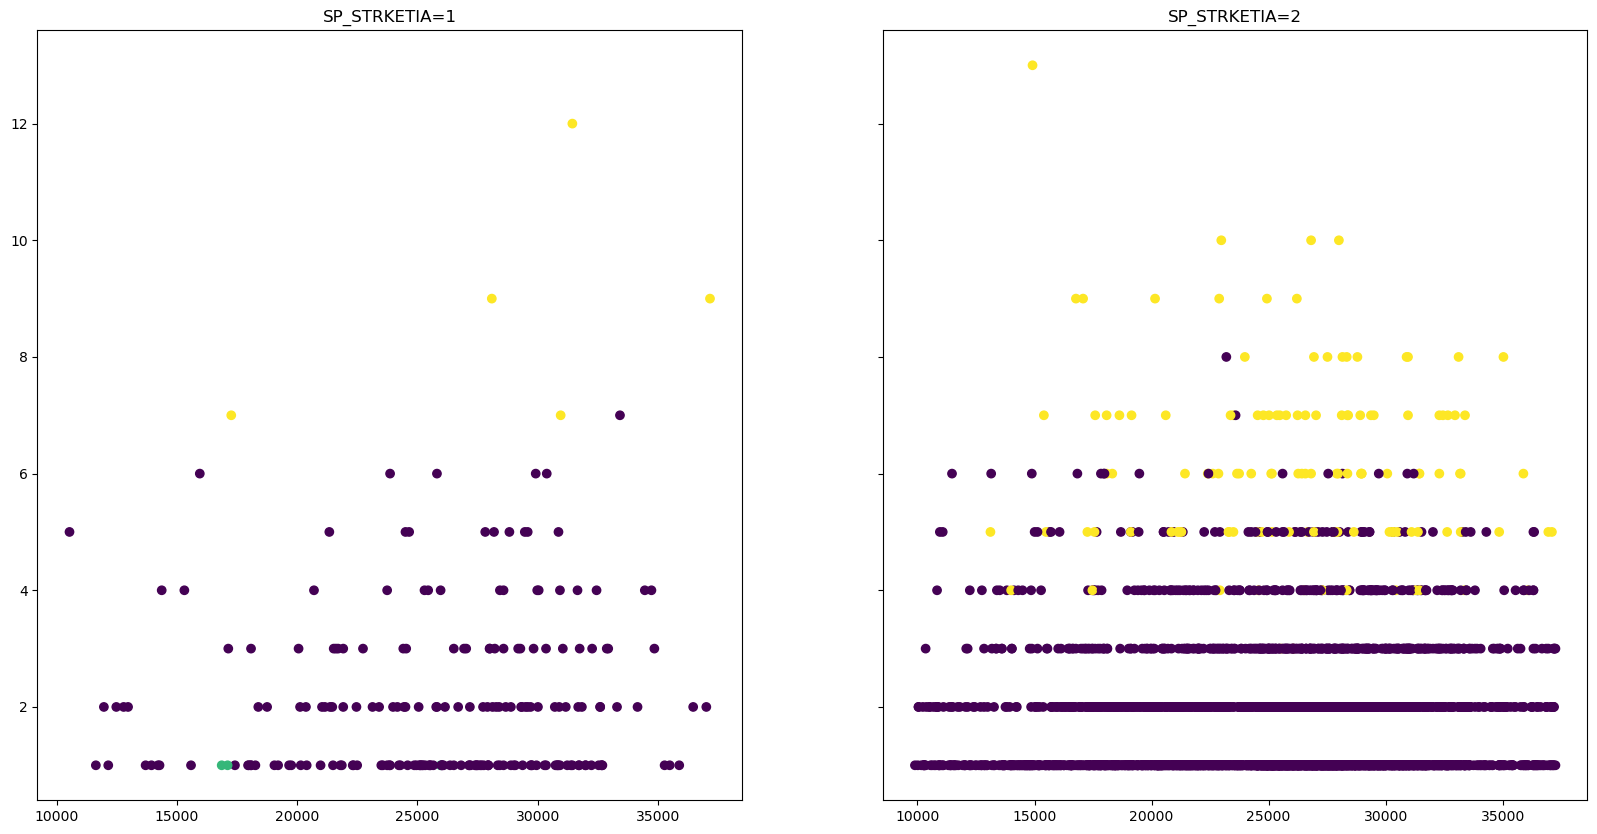

In [107]:
conds = ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]
for cond in conds:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
    for i, r in enumerate([1, 2]):
        ax = axs[i]
        subset = plot_df[(plot_df[cond] == r) & (plot_df["BENE_RACE_CD"] == "2")]
        ax.scatter(subset["Est Age in Days"], subset["Claim Count"], c=subset["cluster"])
        ax.set_title(f"{cond}={r}")
    plt.show()

## DBSCAN Clustering

In [9]:
D = bene_samp.copy().reset_index(drop=True)
D_std = D.copy()
for c in range(D.shape[1]):
    col = D.iloc[:,c]
    D_std.iloc[:,c] = (col - col.mean()) / col.std()

In [ ]:
dist = D_std.apply(eucledian_dist, args=(D_std,), axis=1)
dist = dist.applymap(update_dist, eps=3)

In [45]:
C = DBSCAN(D, dist, 3, 18)

In [46]:
len(C['ClusterList'])

6

In [49]:
res = [-1 for idx in range(D.shape[0])]
for i, cluster in enumerate(C['ClusterList']):
    for elem in cluster:
        res[elem] = i
D['Cluster'] = pd.Series(res)
D_std['Cluster'] = pd.Series(res)

print("DBSCAN")
print(f"eps: 3")
print(f"minpts: 18")
print()
print('Intercluster Distances (Standardized)')

try:
    clusters = pd.DataFrame(D_std[D_std['Cluster'] != -1].groupby('Cluster').mean())
    print(clusters.apply(eucledian_dist, args=(clusters,), axis=1))
except:
    print('No Clusters')
print()
print('-'*80)
print('-'*80)

dbscan_report(D, D_std, C['ClusterList'], C['Noise'])

DBSCAN
eps: 3
minpts: 18

Intercluster Distances (Standardized)
Cluster         0         1         2         3         4         5
Cluster                                                            
0        0.000000  4.524346  2.411560  3.453897  2.290125  6.736202
1        4.524346  0.000000  4.855230  5.611701  4.902511  6.879119
2        2.411560  4.855230  0.000000  3.997999  2.915976  6.740307
3        3.453897  5.611701  3.997999  0.000000  3.826988  7.472483
4        2.290125  4.902511  2.915976  3.826988  0.000000  6.971282
5        6.736202  6.879119  6.740307  7.472483  6.971282  0.000000

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Cluster: 0
Cluster Size: 2527
Center (Standardized): 0.06009, -0.12103, -0.13667, -0.01938, -0.03378, -0.01971, -0.05021, -0.32995, -0.08362, -0.02723, -0.05759, -0.07486, -0.04406, -0.06159, -0.24622, 0.41404, -0.32549, -0.1739

In [125]:
plot_db = D.copy()
plot_db["BENE_RACE_CD"] = (1 * plot_db["BENE_RACE_CD_1"] +
                           2 * plot_db["BENE_RACE_CD_2"] +
                           3 * plot_db["BENE_RACE_CD_3"] +
                           5 * plot_db["BENE_RACE_CD_5"]).astype(str)
plot_db["Cluster"] = plot_db["Cluster"] + 1

In [126]:
plot_db

Est Age in Days  CLM_PMT_AMT  Claim Count  BENE_SEX_IDENT_CD  \
0               14092       6000.0            1                  0   
1               28702      57000.0            1                  0   
2               22644       4000.0            1                  0   
3               21032       6000.0            1                  0   
4               32233       6000.0            1                  1   
...               ...          ...          ...                ...   
3773            25354       5000.0            1                  0   
3774            32902       5000.0            1                  0   
3775            13209       3000.0            1                  0   
3776            23650      14000.0            1                  0   
3777            29129       7900.0            3                  0   

      SP_ALZHDMTA  SP_CHF  SP_CHRNKIDN  SP_CNCR  SP_COPD  SP_DEPRESSN  ...  \
0               0       1            0        1        0            1  ...   
1               0       0            0        0        0            1  ...   
2               0       1            0        0        1            0  ...   
3               1       1            0        0        0            0  ...   
4               0       1            0        0        0            0  ...   
...           ...     ...          ...      ...      ...          ...  ...   
3773            0       0            1        0        0            0  ...   
3774            0       0            0        0        1            0  ...   
3775            0       0            0        0        1            0  ...   
3776            0       0            0        0        0            1  ...   
3777            1       1            0        0        0            1  ...   

      SP_ISCHMCHT  SP_OSTEOPRS  SP_RA_OA  SP_STRKETIA  BENE_RACE_CD_1  \
0               1            1         0            0               1   
1               1            0         1            0               1   
2               0            0         1            0               1   
3               0            1         0            0               0   
4               1            0         0            0               1   
...           ...          ...       ...          ...             ...   
3773            0            0         0            0               1   
3774            1            0         0            0               0   
3775            1            0         0            0               1   
3776            1            0         1            0               1   
3777            0            1         0            0               1   

      BENE_RACE_CD_2  BENE_RACE_CD_3  BENE_RACE_CD_5  Cluster  BENE_RACE_CD  
0                  0               0               0        0             1  
1                  0               0               0        1             1  
2                  0               0               0        0             1  
3                  0               0               1        0             5  
4                  0               0               0        1             1  
...              ...             ...             ...      ...           ...  
3773               0               0               0        1             1  
3774               0               0               1        0             5  
3775               0               0               0        1             1  
3776               0               0               0        1             1  
3777               0               0               0        1             1  

[3778 rows x 21 columns]

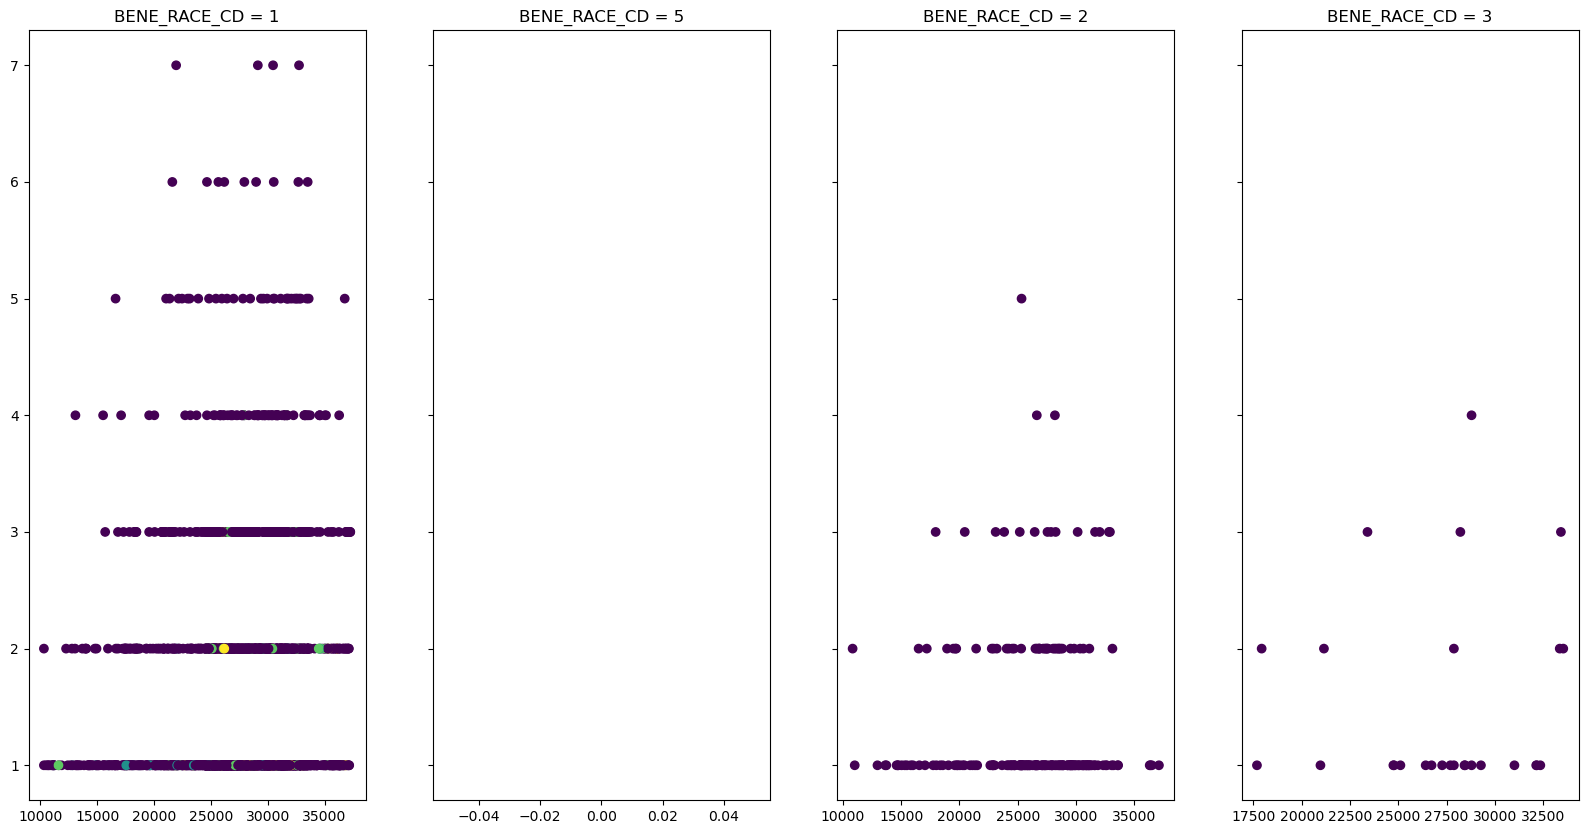

In [128]:
rs = plot_db["BENE_RACE_CD"].unique()
fig, axs = plt.subplots(1, len(rs), sharey=True, figsize=(20, 10))
for i, r in enumerate(rs):
    ax = axs[i]
    subset = plot_db[(plot_db["BENE_RACE_CD"] == r) & (plot_db["Cluster"] != 0)]
    ax.scatter(subset["Est Age in Days"], subset["Claim Count"], c=subset["Cluster"])
    ax.set_title(f"BENE_RACE_CD = {r}")
plt.show()

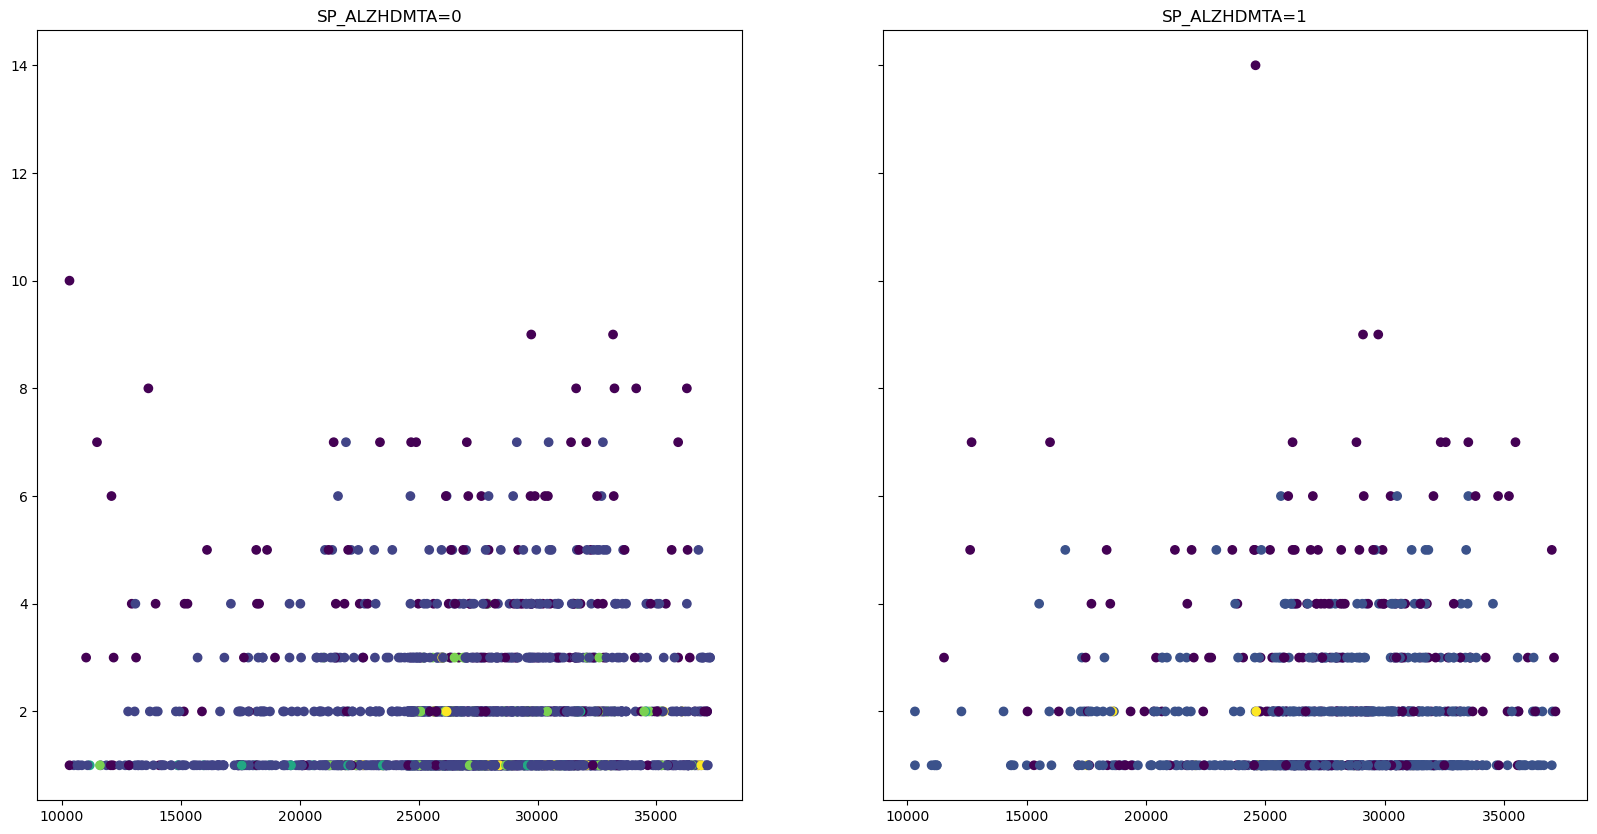

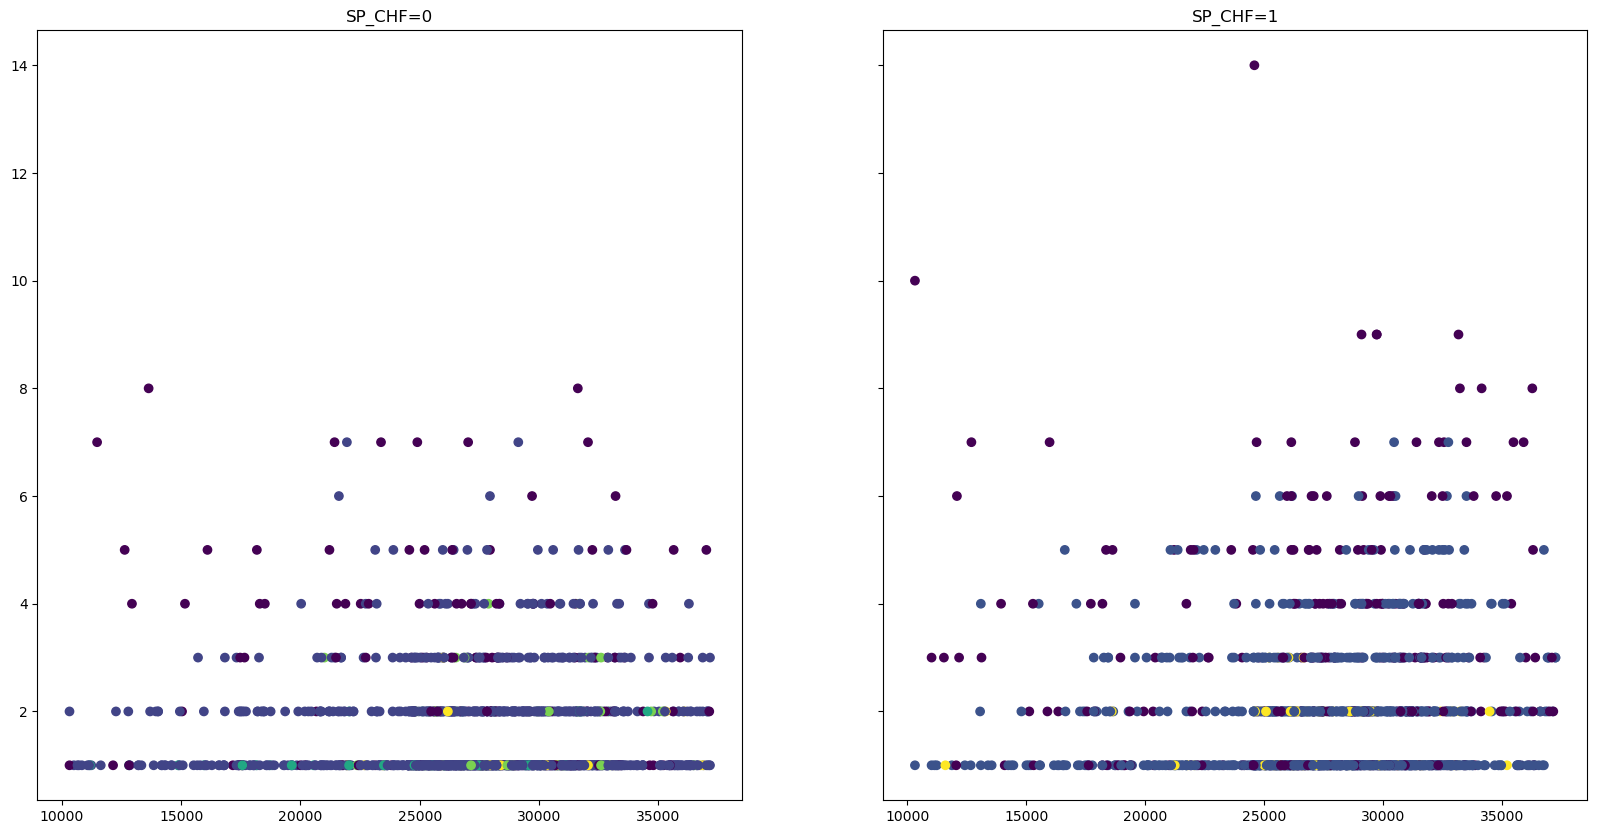

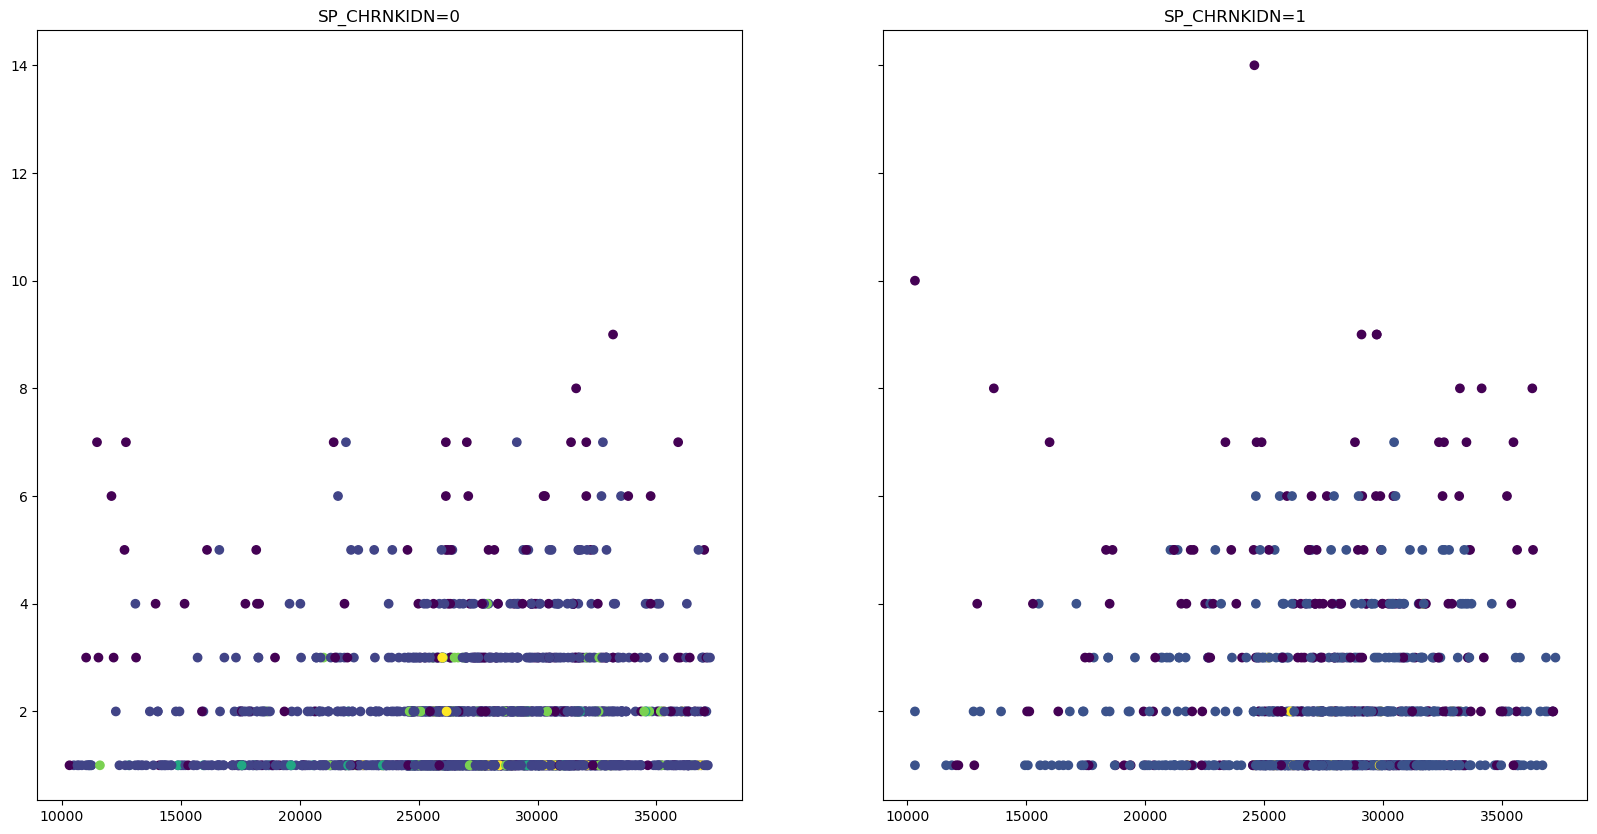

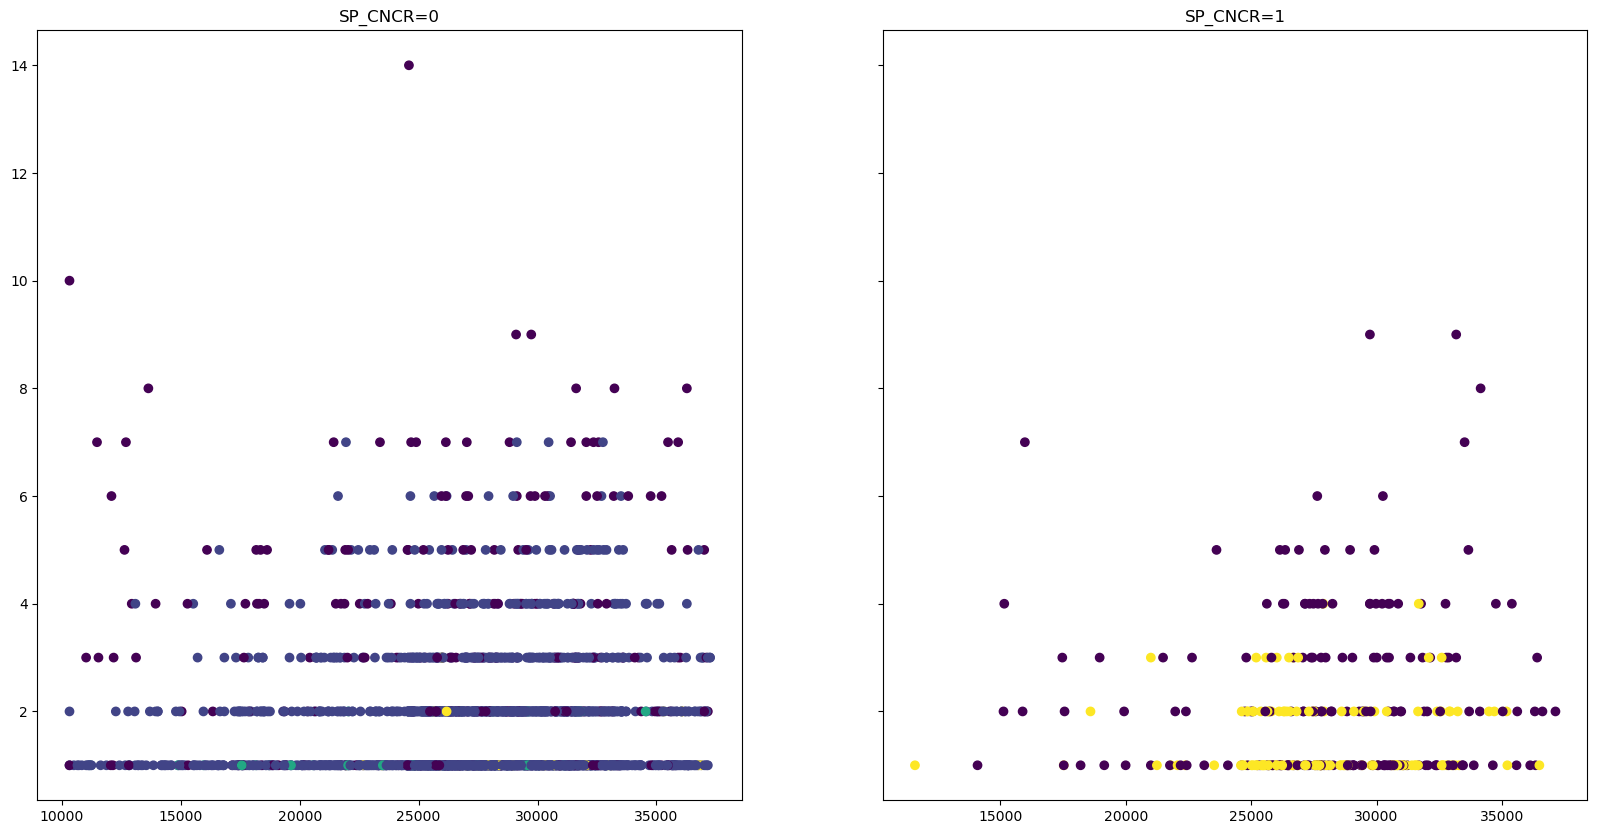

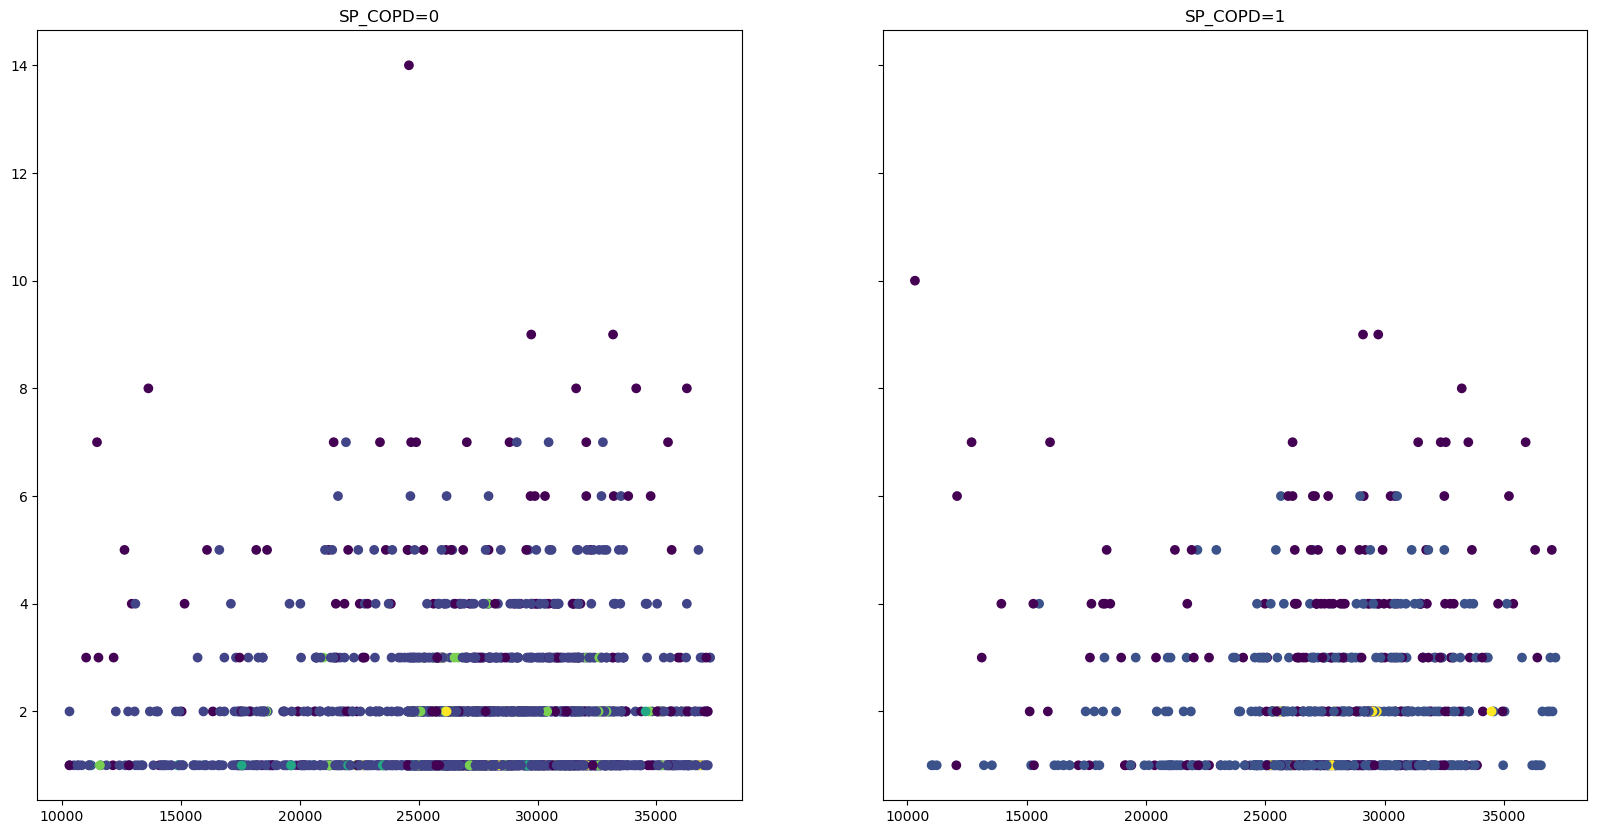

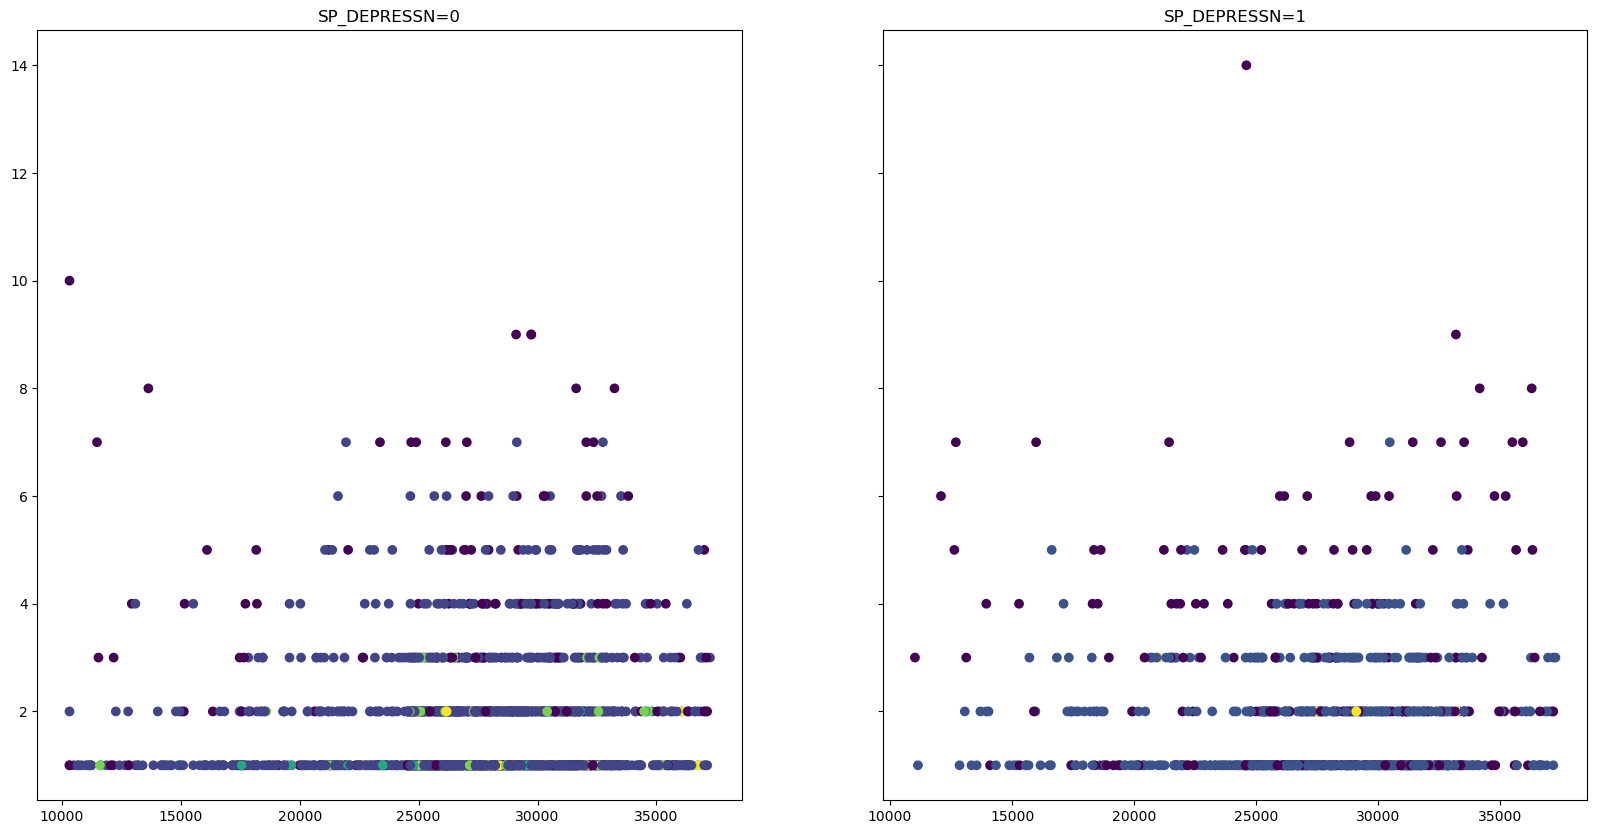

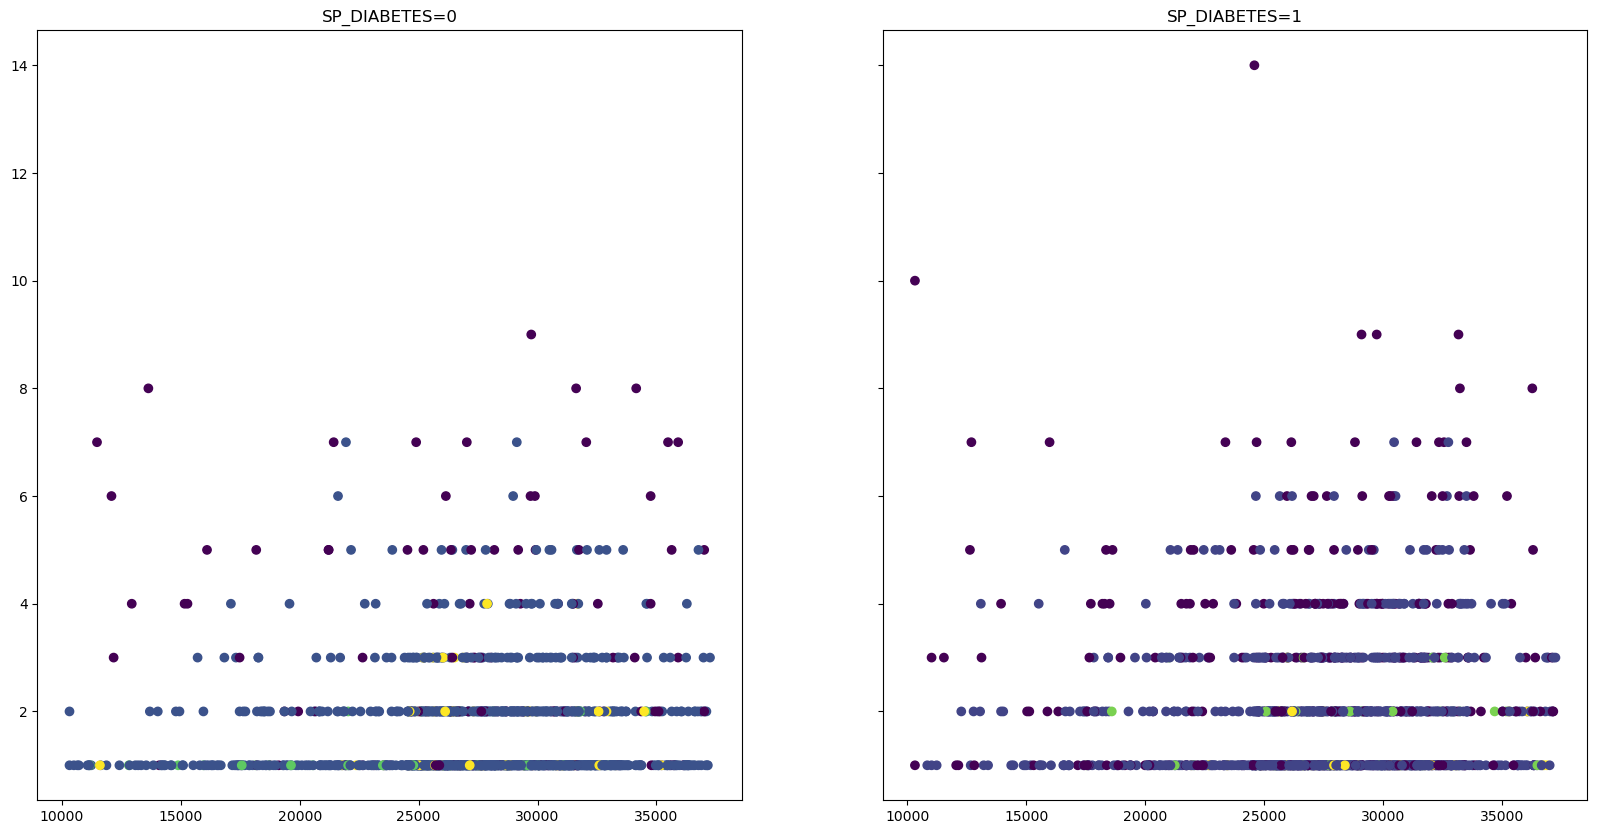

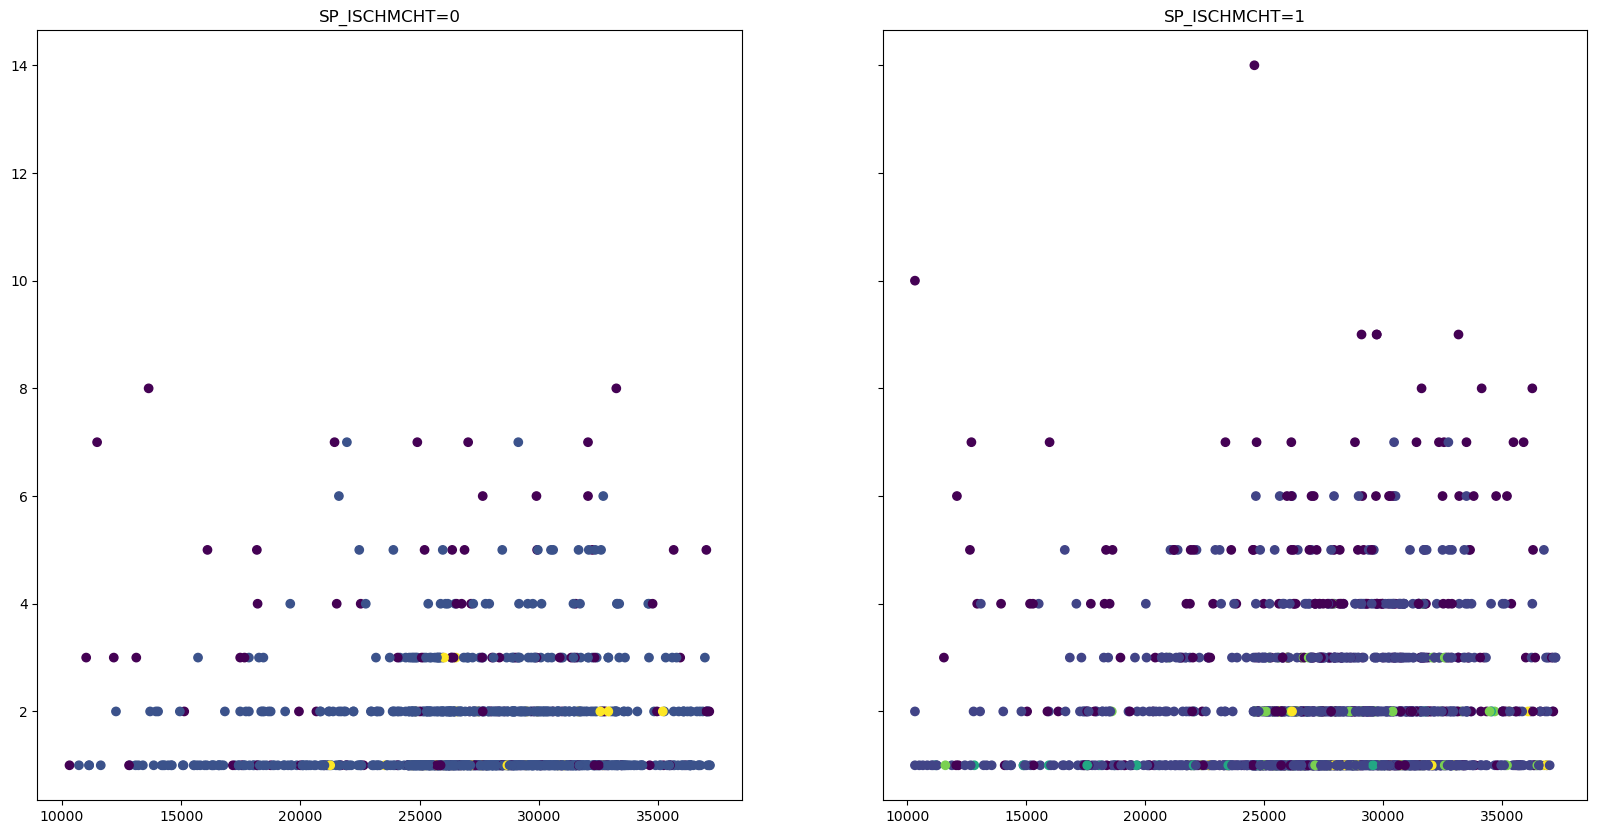

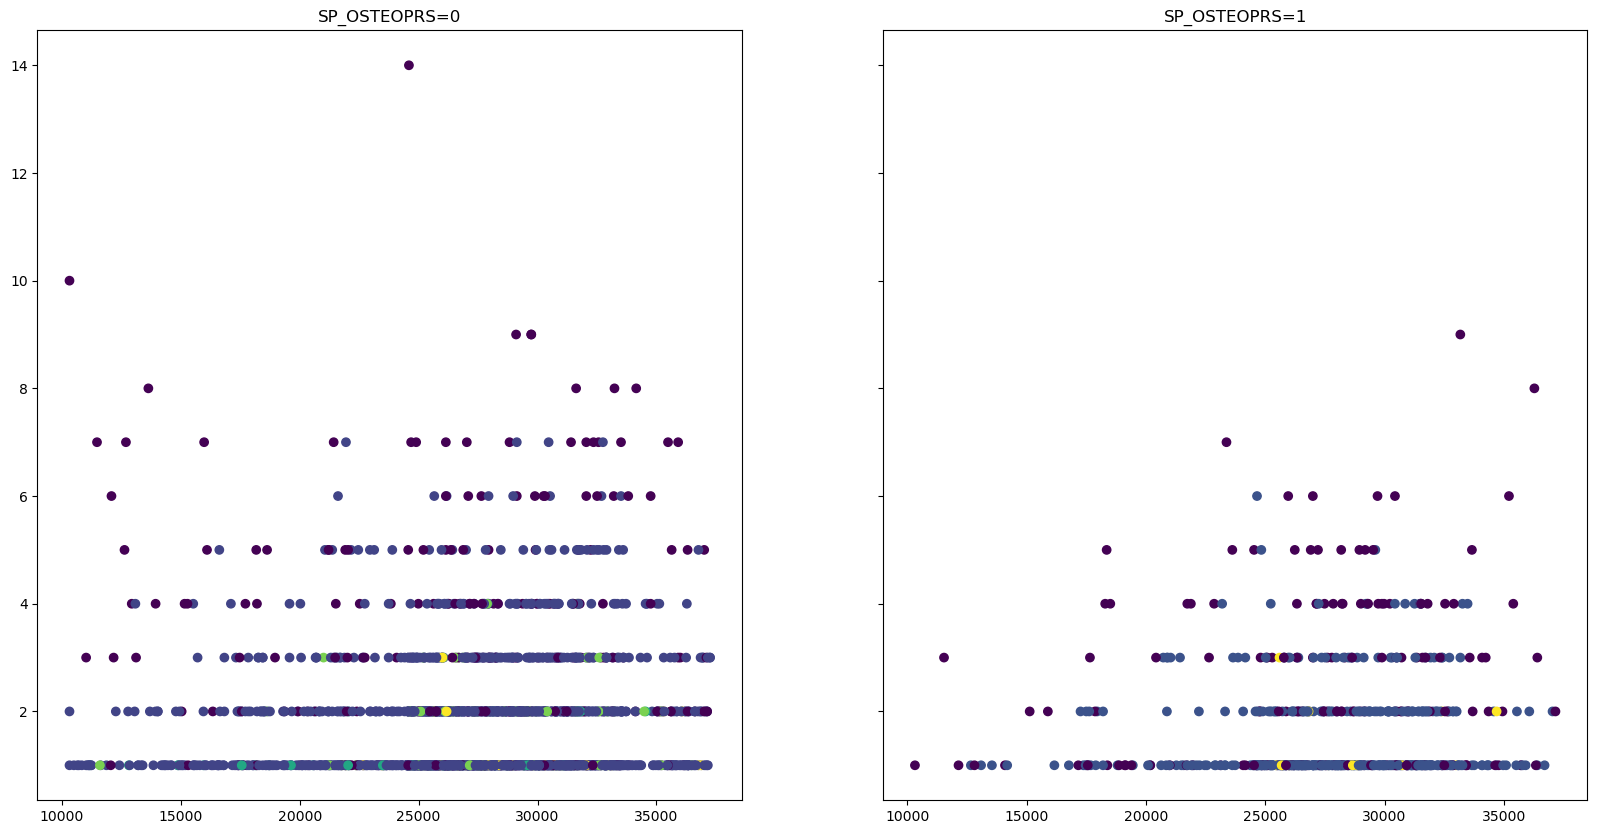

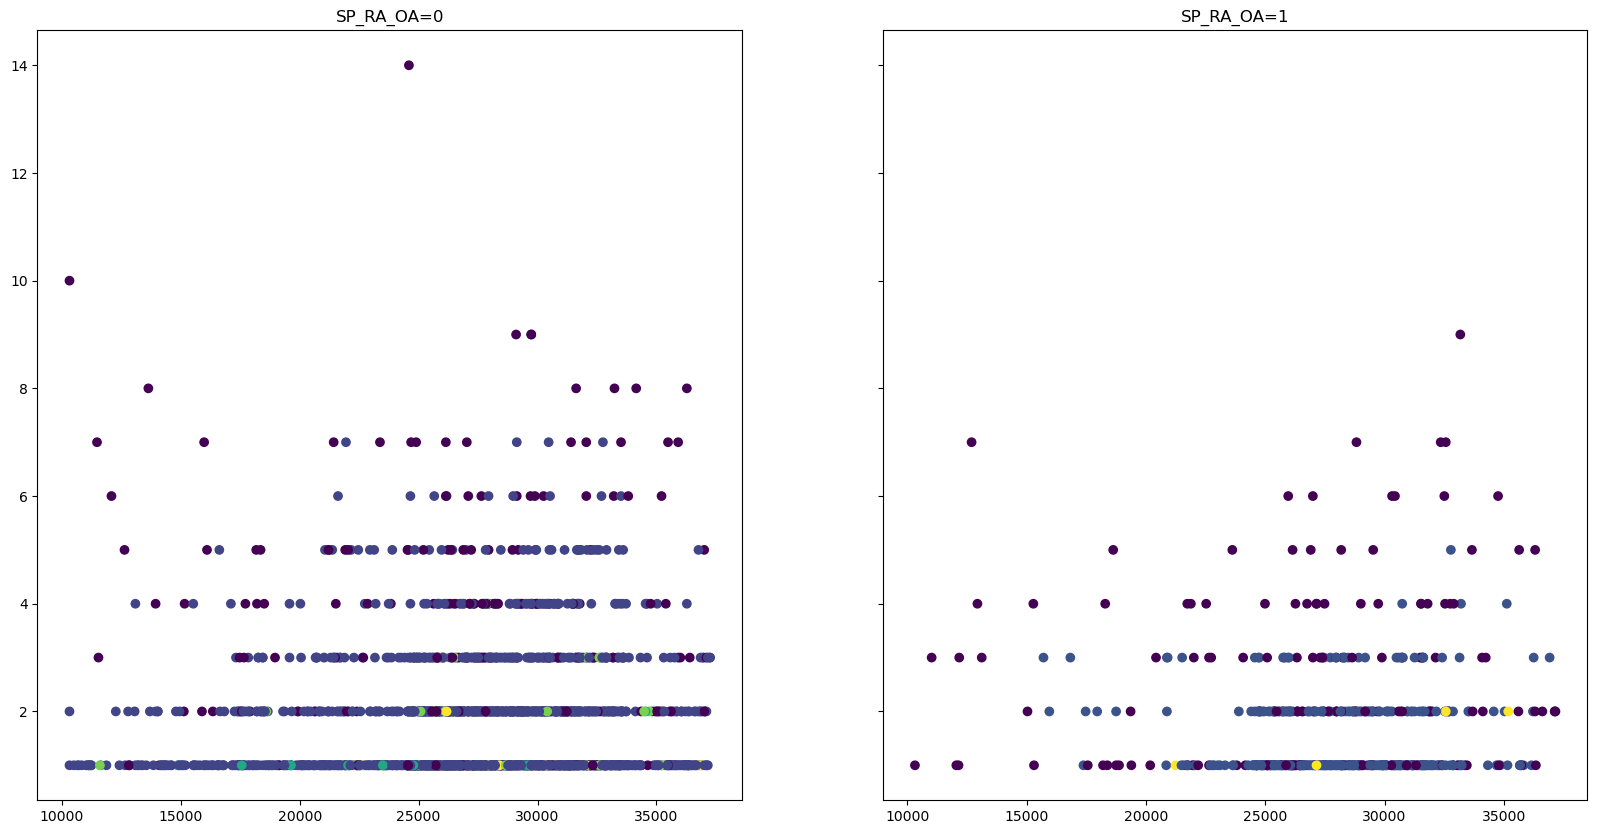

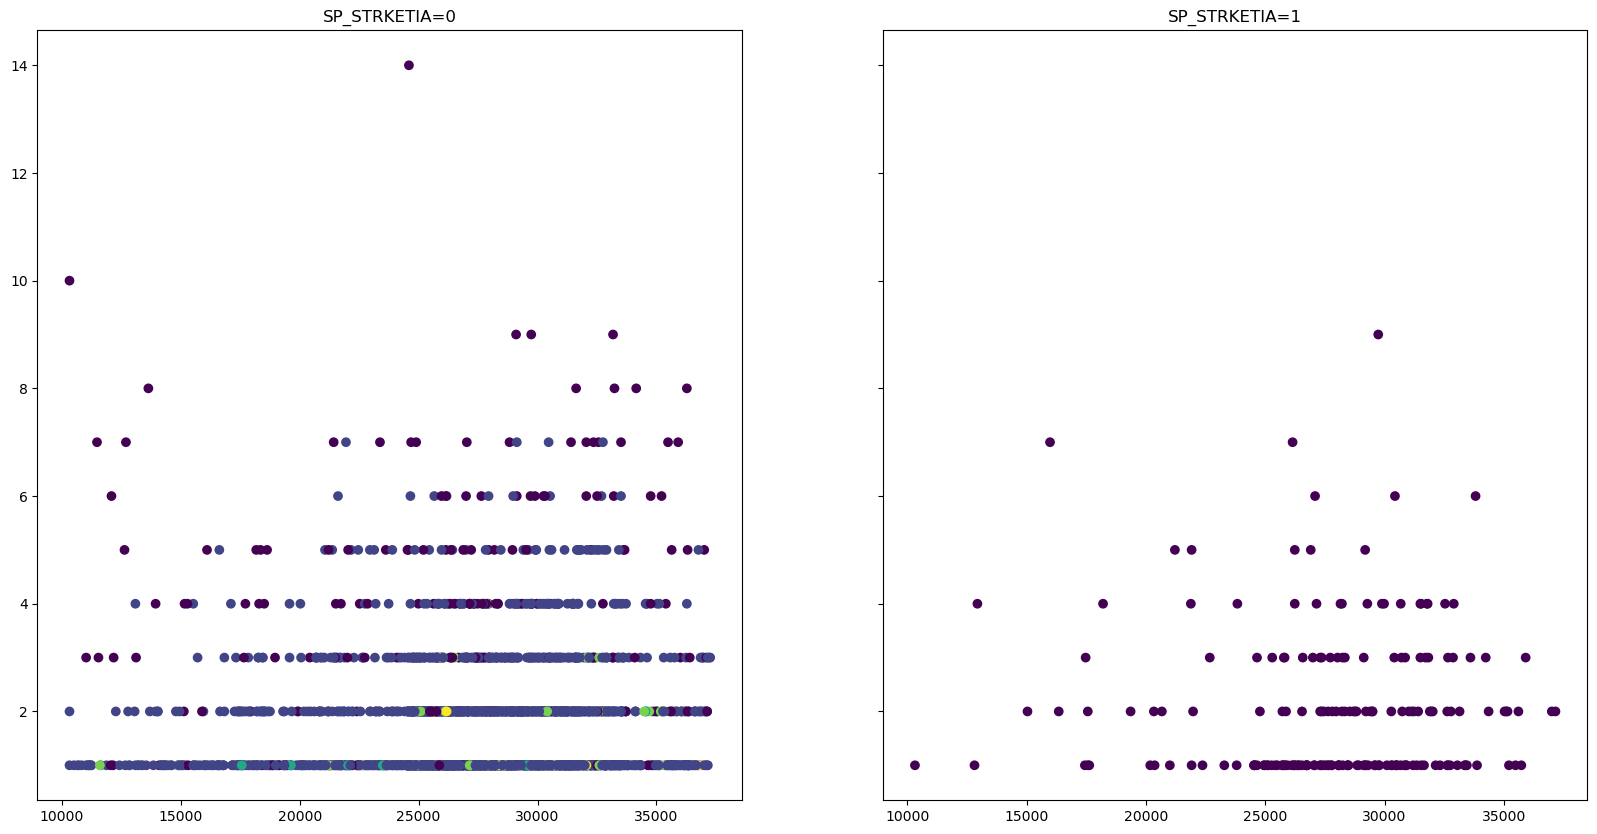

In [130]:
conds = ["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN",
               "SP_CNCR", "SP_COPD", "SP_DEPRESSN",
               "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS",
               "SP_RA_OA", "SP_STRKETIA"]
for cond in conds:
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
    for i, r in enumerate([0, 1]):
        ax = axs[i]
        subset = plot_db[(plot_db[cond] == r) & (plot_db["BENE_RACE_CD"] == "1")]
        ax.scatter(subset["Est Age in Days"], subset["Claim Count"], c=subset["Cluster"])
        ax.set_title(f"{cond}={r}")
    plt.show()

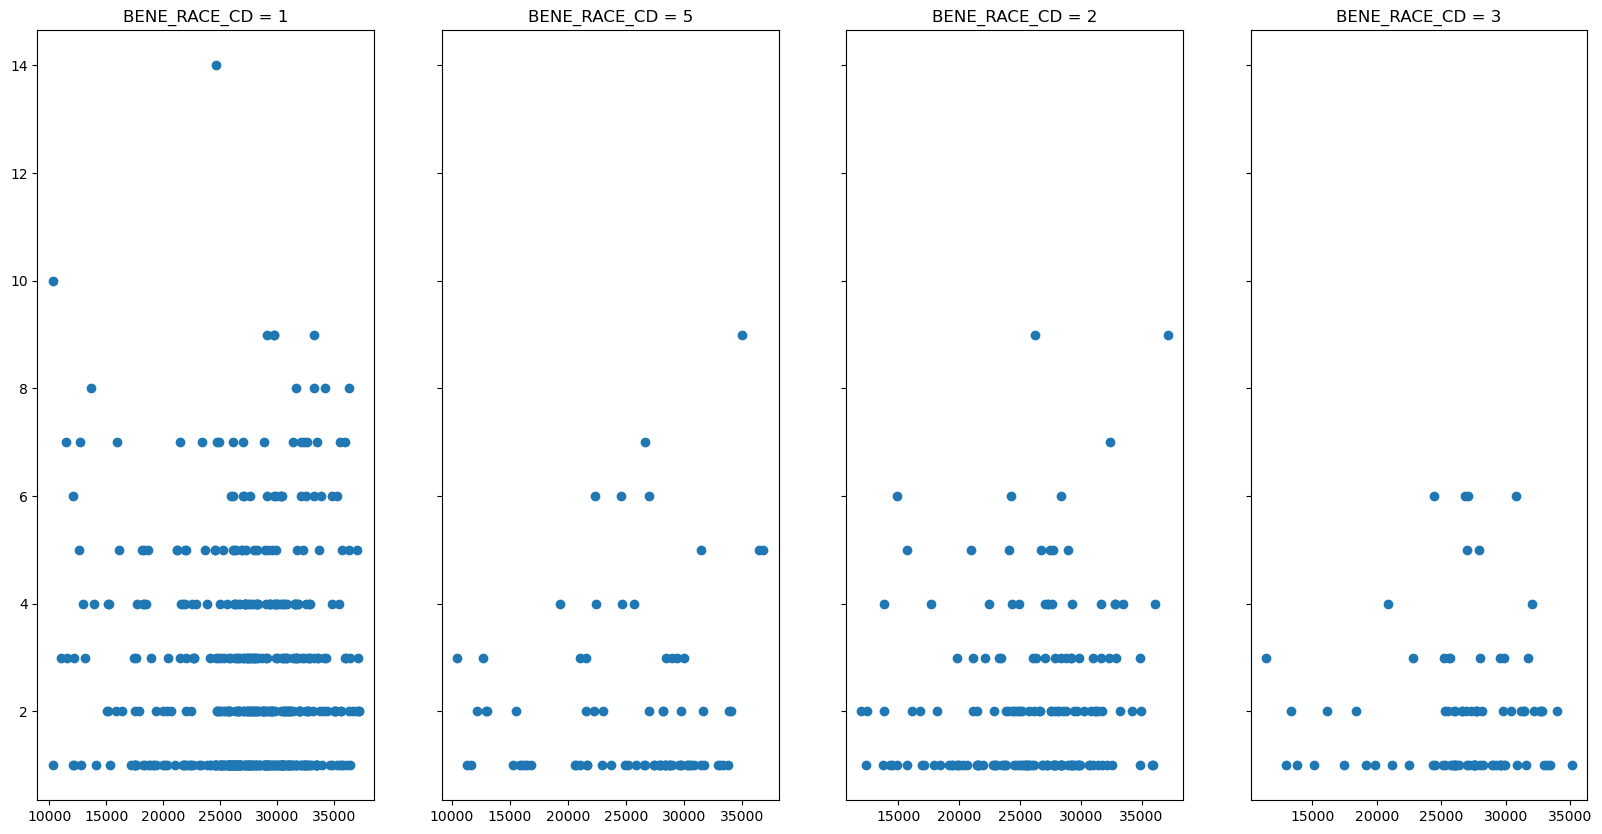

In [132]:
rs = plot_db["BENE_RACE_CD"].unique()
fig, axs = plt.subplots(1, len(rs), sharey=True, figsize=(20, 10))
for i, r in enumerate(rs):
    ax = axs[i]
    subset = plot_db[(plot_db["BENE_RACE_CD"] == r) & (plot_db["Cluster"] == 0)]
    ax.scatter(subset["Est Age in Days"], subset["Claim Count"])
    ax.set_title(f"BENE_RACE_CD = {r}")
plt.show()